<html>
    <h4>&#129395; <font color=orange>Cleaning Data use for Modeling. This Cleaning version focus only Job Requirement and Job Description columns. For V2 dropped only duplicated and missing values of Job_Requirement and Job_Description but still keep missing values of other columns.</font></h4>
</html>

<html>
    <h1>&#129303; <font color=blue>Import required library</font></h1>
</html>

In [1]:
import pandas as pd
import glob
import re
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

<html>
    <h1>&#129303; <font color=blue>Read data from mulitple csv/excel files into one Dataframe</font></h1>
</html>

In [2]:
# # Get the full path of the folder
# folder_path = "Data_For_Modeling"

# # Get a list of all the Excel and CSV files in the folder
# file_list = glob.glob(folder_path + "/*.xlsx") + glob.glob(folder_path + "/*.csv")

# # Read each file into a DataFrame
# dataframes = []
# for file_path in file_list:
#     # Read the file into a DataFrame
#     dataframe = pd.read_excel(file_path) if file_path.endswith(".xlsx") else pd.read_csv(file_path)

#     # Add the DataFrame to the list of DataFrames
#     dataframes.append(dataframe)

# # Concatenate the DataFrames into one DataFrame
# data_for_modeling = pd.concat(dataframes, ignore_index=True)

# # data_for_modeling.drop(columns=data_for_modeling.columns.difference(['Job Description', 'Job Requirement']), inplace=True)

# # Save the combined DataFrame to a new file
# data_for_modeling.to_csv("Data_For_Modeling.csv", index=False)

In [3]:
df = pd.read_csv('Data_For_Modeling.csv')
df = pd.DataFrame(df)

<html>
    <h1>&#129303; <font color=blue>Data Understanding</font></h1>
</html>

In [4]:
# Preview Data
df

Unnamed: 0                                jobUrl  \
0                0  https://www.camhr.com/a/job/10021536   
1                1  https://www.camhr.com/a/job/10021535   
2                2  https://www.camhr.com/a/job/10021534   
3                3  https://www.camhr.com/a/job/10021533   
4                4  https://www.camhr.com/a/job/10021532   
...            ...                                   ...   
214590         243  https://www.camhr.com/a/job/10567272   
214591         244  https://www.camhr.com/a/job/10567273   
214592         245  https://www.camhr.com/a/job/10567274   
214593         246  https://www.camhr.com/a/job/10567275   
214594         247  https://www.camhr.com/a/job/10567276   

                                                job title  \
0       Waiter,Waitress,and Bartender(Borei Angkor Res...   
1                                       Waiter & Waitress   
2                                   អ្នកលក់ក្នុងក្រុមហ៊ុន   
3       kitchen staff/hall staff 100-300$ ( Chinese Pr...   
4                                            Office staff   
...                                                   ...   
214590                                  Event Coordinator   
214591                                  Event Coordinator   
214592                                  Event Coordinator   
214593                      Head of Business Intelligence   
214594                         Sales Manager ( Province )   

                          company_name  \
0         Innotality Corporation, Ltd.   
1           Wild Wing Restaurant & Bar   
2                       Hong Kong Shop   
3         Yokohama Torigen Restaurant    
4               ComSolution Global Co.   
...                                ...   
214590                 KONG NUON GROUP   
214591                 KONG NUON GROUP   
214592                 KONG NUON GROUP   
214593  Orienda International Hospital   
214594                 KONG NUON GROUP   

                                                 position        Level  \
0       Waiter,Waitress,and Bartender(Borei Angkor Res...  Entry Level   
1                                       Waiter & Waitress       Middle   
2                                   អ្នកលក់ក្នុងក្រុមហ៊ុន  Entry Level   
3       kitchen staff/hall staff 100-300$ ( Chinese Pr...  Entry Level   
4                                            Office staff          Top   
...                                                   ...          ...   
214590                                  Event Coordinator       Middle   
214591                                  Event Coordinator       Middle   
214592                                  Event Coordinator       Middle   
214593                      Head of Business Intelligence          Top   
214594                         Sales Manager ( Province )          Top   

       Year of Exp Hiring       Salary          Sex  ...  \
0                1      8  Negotiable   Male/Female  ...   
1                1      4  Negotiable   Male/Female  ...   
2                1     10        <$200  Male/Female  ...   
3                ~      ~  Negotiable       Female   ...   
4                1      2  Negotiable       Female   ...   
...            ...    ...          ...          ...  ...   
214590           ~      3  Negotiable   Male/Female  ...   
214591           ~      3  Negotiable   Male/Female  ...   
214592           ~      3  Negotiable   Male/Female  ...   
214593           5      ~  Negotiable   Male/Female  ...   
214594           3      3  Negotiable   Male/Female  ...   

                                          Industry  \
0          \n          Hotel/Hospitality\n           
1           \n          Food & Beverages\n           
2           \n          Wholesale/Retail\n           
3           \n          Food & Beverages\n           
4           \n          Wholesale/Retail\n           
...                                            ...   
214590  \n          Automotive - Vehicle\n           
214591 

<html>
    <h2>&#128576; <font color=red>Remove irrelevant data</font></h2>
</html>

In [5]:
#Check columns of Dataframe
df.columns

Index(['Unnamed: 0', 'jobUrl', 'job title', 'company_name', 'position',
       'Level', 'Year of Exp', 'Hiring', 'Salary', 'Sex', 'Age', 'Term',
       'Function/Category', 'Industry', 'Qualification', 'Language',
       'Location', 'Job Description', 'Job Requirement', 'Company Profile',
       'Publish Date', 'Closing Date', 'Contact Info'],
      dtype='object')

In [6]:
# Drop unnecessary columns such as Unnamed: 0,jobUrl,position,Company Profile and Contact Info
df.drop(columns=['Unnamed: 0','jobUrl','position','Company Profile','Contact Info'],inplace=True)
df.columns

Index(['job title', 'company_name', 'Level', 'Year of Exp', 'Hiring', 'Salary',
       'Sex', 'Age', 'Term', 'Function/Category', 'Industry', 'Qualification',
       'Language', 'Location', 'Job Description', 'Job Requirement',
       'Publish Date', 'Closing Date'],
      dtype='object')

<html>
    <h2>&#129303; <font color=blue>Keep only English data/text (drop Khmer, Chinese,…from the dataset)</font></h2>
    <h3>&#128576; <font color=red>Remove Non-English text/data</font></h3>
</html>

In [7]:
# Assign Text data for testing
Text = [np.nan,'Senior Risk Officer ( Negotiable ), at បឹងកេងកង.','បុគ្គលិកផ្នែកលក់ នៅភ្នំពេញ ចំនួន ៣នាក់','បុគ្គលិកផ្នែកលក់ (ចុះលក់តាមឡាន) $280-$300 (បន្ថែមប្រាក់លើកទឹកចិត្តពីការលក់ប្រចាំខែ)','Warehouse Supervisor  500$-850$ ( based in Sre Ambel, Koh Kong)','Interior Designer / អ្នកតចនាផ្នែកខាងក្នុង']

# Convert to dataframe
data1 = pd.DataFrame({'Origin Text': Text})

# Define a regular expression pattern to match non-English characters
pattern = r'[^\x00-\x7F]+'

# Define a function to remove non-english text 
def clean_text(text):
    if isinstance(text, str):
        cleaned_text = re.sub(pattern, '', text)
        # If after remove non-english and the result is empty string convert it to NaN value
        if cleaned_text.strip() == '':
            return np.nan
        return cleaned_text
    else:
        return text

# Test by Applying the clean_text function to the 'English Text' column
data1['English Text'] = data1['Origin Text'].apply(clean_text)

# Display Testing data
data1

Origin Text  \
0                                                NaN   
1   Senior Risk Officer ( Negotiable ), at បឹងកេងកង.   
2             បុគ្គលិកផ្នែកលក់ នៅភ្នំពេញ ចំនួន ៣នាក់   
3  បុគ្គលិកផ្នែកលក់ (ចុះលក់តាមឡាន) $280-$300 (បន្...   
4  Warehouse Supervisor  500$-850$ ( based in Sre...   
5          Interior Designer / អ្នកតចនាផ្នែកខាងក្នុង   

                                        English Text  
0                                                NaN  
1           Senior Risk Officer ( Negotiable ), at .  
2                                                NaN  
3                                    () $280-$300 ()  
4  Warehouse Supervisor  500$-850$ ( based in Sre...  
5                               Interior Designer /

In [8]:
# Apply clean_text function to keep only english text on 4 columns Job Title, Job Description and Job Requirements columns
df['Job Description'] = df['Job Description'].apply(clean_text)
df['Job Requirement'] = df['Job Requirement'].apply(clean_text)

<html>
    <h2>&#128576; <font color=red>Deduplicated Data</font></h2>
</html>

In [9]:
# Check duplicate data on Job Requirement and Job Description
df.duplicated(subset=['Job Requirement', 'Job Description']).sum() 

87350

In [10]:
# Drop duplicate data on Job Requirement and Job Description
df = pd.DataFrame(df.drop_duplicates(subset=['Job Requirement', 'Job Description']))
# Check duplicate data again on Job Requirement and Job Description
df.duplicated(subset=['Job Requirement', 'Job Description']).sum()

0

In [11]:
# Check duplicate data
df.duplicated().sum()

0

In [12]:
# Drop duplicate data
df = pd.DataFrame(df.drop_duplicates())
# Check duplicate data
df.duplicated().sum()

0

<html>
    <h2>&#128576; <font color=red>Deal with Missing Values</font></h2>
</html>

In [13]:
# Check missing values
df.isnull().sum()

job title                0
company_name            49
Level                    0
Year of Exp              0
Hiring                   0
Salary                   0
Sex                      0
Age                      0
Term                     0
Function/Category        0
Industry                 0
Qualification            0
Language                 0
Location                 0
Job Description        645
Job Requirement       6319
Publish Date         10221
Closing Date         10221
dtype: int64

In [14]:
# Drop rows where Job Description, Job Requirement have missing values
df.dropna(subset=['Job Description'],inplace=True)
df.dropna(subset=['Job Requirement'],inplace=True)
# Check missing values again
df.isnull().sum()

job title               0
company_name           48
Level                   0
Year of Exp             0
Hiring                  0
Salary                  0
Sex                     0
Age                     0
Term                    0
Function/Category       0
Industry                0
Qualification           0
Language                0
Location                0
Job Description         0
Job Requirement         0
Publish Date         4286
Closing Date         4286
dtype: int64

<html>
    <h2>&#128576; <font color=red>Fix structural errors</font></h2>
</html>

In [15]:
# Rename some Columns
df.rename(columns = {'job title':'Job_Title',
                     'company_name':'Company_Name',
                     'Level':'Position_Level',
                     'Year of Exp':'Year_Experience',
                     'Sex':'Gender',
                     'Term':'Job_Type',
                     'Function/Category':'Job_Category',
                     'Job Description':'Job_Description',
                     'Job Requirement':'Job_Requirement',
                     'Publish Date':'Publish_Date',
                     'Closing Date':'Closing_Date'}, inplace = True)
df.head() 

Job_Title  \
277                     Staff (General Affairs &Labor)   
278                                         Sale Admin   
279  Sales Consultant. (Be able to speak Japanese L...   
280  Marketing Manager Assistant Marketing Manager ...   
281                  MECHANICAL & ELECTRICAL ENGINEER    

                 Company_Name Position_Level Year_Experience Hiring  \
277                   CDL-HR          Middle               1      1   
278   Toyota Cambodia Co. Ltd              ~               1      1   
279   Toyota Cambodia Co. Ltd              ~               ~      1   
280        JS Global Camboida         Senior               2      ~   
281  N.G.E Energy Pte Limited              ~               2      1   

          Salary       Gender            Age                         Job_Type  \
277  Negotiable   Male/Female             21  \n          Full Time\n           
278  Negotiable   Male/Female  Age Unlimited  \n          Full Time\n           
279  Negotiable   Male/Female  Age Unlimited  \n          Full Time\n           
280    $200-$500  Male/Female        25 ~ 30  \n          Full Time\n           
281  Negotiable   Male/Female  Age Unlimited  \n          Full Time\n           

                             Job_Category  \
277  \n          Administration\n           
278           \n          Sales\n           
279           \n          Sales\n           
280       \n          Marketing\n           
281   \n          Manufacturing\n           

                                              Industry  \
277    \n          General Business Services\n           
278         \n          Automotive - Vehicle\n           
279         \n          Automotive - Vehicle\n           
280                      \n          Trading\n           
281  \n          Energy/Power/Water/Oil & Gas\n    ...   

                             Qualification  \
277  \n          Bachelor Degree\n           
278  \n          Bachelor Degree\n           
279  \n          Bachelor Degree\n           
280           \n          Others\n           
281  \n          Bachelor Degree\n           

                                              Language  \
277               \n          English-- Good\n           
278               \n          English-- Good\n           
279  \n          English-- Good Japanese-- Good\n  ...   
280               \n          English-- Good\n           
281               \n          English-- Good\n           

                             Location  \
277  \n          Phnom Penh\n           
278  \n          Phnom Penh\n           
279  \n          Phnom Penh\n           
280  \n          Phnom Penh\n           
281  \n          Phnom Penh\n           

                                       Job_Description  \
277  - Administrative - Clerical\n- Schedule Manage...   
278   Following up on competitorss movement in term...   
279   Proactively indentify new inquiry and maintai...   
280  - Approximately 2+ years of sales experience i...   
281  - Understand project planning\n- Mechanical an...   

                                       Job_Requirement Publish_Date  \
277  - Fluent in English (written and spoken)\n- Ha...          NaN   
278   Bachelor degree of English Literature/Managem...          NaN   
279   At least holding BBA Degree preferably \n Goo...          NaN   
280  About us\t: JS GLOBAL (CAMBODIA) CO., LTD\nOur...          NaN   
281  - Male/Female, with maximum age is 40 years ol...          NaN   

    Closing_Date  
277          NaN  
278          NaN  
279          NaN  
280          NaN  
281          NaN

In [16]:
# Check df columns
df.columns

Index(['Job_Title', 'Company_Name', 'Position_Level', 'Year_Experience',
       'Hiring', 'Salary', 'Gender', 'Age', 'Job_Type', 'Job_Category',
       'Industry', 'Qualification', 'Language', 'Location', 'Job_Description',
       'Job_Requirement', 'Publish_Date', 'Closing_Date'],
      dtype='object')

<html>
    <h3>&#128576; <font color=red>Remove begin - end whitespace of each columns</font></h3>
</html>

In [17]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

<html>
    <h3>&#129303; <font color=purple>Display data description</font></h3>
</html>

In [18]:
df.select_dtypes(include=['object']).describe()

Job_Title                      Company_Name Position_Level  \
count       120282                            120234         120282   
unique       63133                             15415              6   
top     Accountant  Premium Care Business Consulting              ~   
freq          1598                              2564          61303   

       Year_Experience  Hiring      Salary  Gender            Age   Job_Type  \
count           120282  120282      120282  120282         120282     120282   
unique              22     110           8       4            371          6   
top                  ~       1  Negotiable       ~  Age Unlimited  Full Time   
freq             68937   60116       60879   60681          93201     110866   

       Job_Category Industry    Qualification        Language    Location  \
count        120282   120282           120282          120282      120282   
unique           37       49                9             810        1539   
top           Sales        ~  Bachelor Degree  English-- Good  Phnom Penh   
freq          14600    48583            55613           56257       99978   

       Job_Description Job_Requirement              Publish_Date  \
count           120282          120282                    115996   
unique           97352          108834                      2914   
top             #NAME?          #NAME?  Publish Date：Sep-06-2013   
freq              3963             925                       288   

                     Closing_Date  
count                      115996  
unique                       3100  
top     Closing Date：Invalid date  
freq                         2568

<html>
    <h3>&#129303; <font color=purple>Visualize some columns</font></h3>
</html>

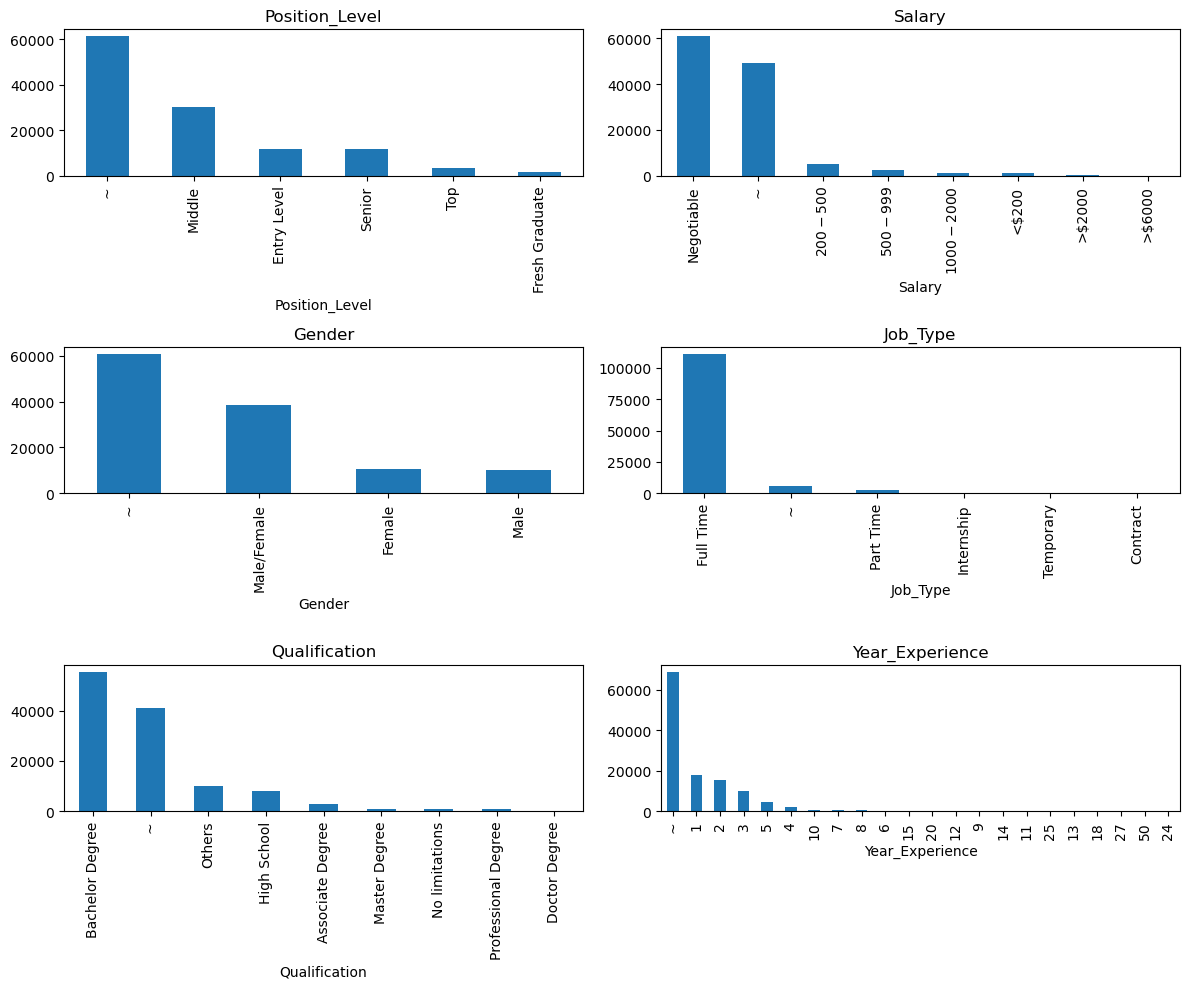

In [19]:
# Define the columns
columns = ['Position_Level', 'Salary', 'Gender', 'Job_Type','Qualification','Year_Experience']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through the columns and create bar plots
for i, column in enumerate(columns):
    df[column].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

<html>
    <h2>&#129303; <font color=blue>Start Cleaning focus on Job Requirement and Job Description first</font></h2>
</html>

In [20]:
# Define function to remove extra_line from both columns
def remove_extra_line(text):
    stripped_string = re.sub(r"\n\s+", "\n", text)
    return stripped_string

# Apply function to both columns
df['Job_Description'] = df['Job_Description'].apply(remove_extra_line)
df['Job_Requirement'] = df['Job_Requirement'].apply(remove_extra_line)

In [21]:
# Define a function to remove punctuation except full stop/period
def remove_punctuation(text):
    text_without_special = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    # Find and replace patterns like '3Age' or '2age' with '3 Age' or '2 Age'
    text = re.sub(r'(\d)([Aa]ge)', r'\1 \2', text_without_special)
    return text

In [22]:
# Apply function to both columns
df['Job_Description'] = df['Job_Description'].apply(remove_punctuation)
df['Job_Requirement'] = df['Job_Requirement'].apply(remove_punctuation)
df.head().style.background_gradient(cmap='jet')

In [23]:
# Define function to process description on both columns which is add . if there is no . on some lines
def process_description(description):
    # Split the text into lines based on line breaks
    lines = description.split('\n')
    
    # Process each line to add a full stop at the end if it doesn't have one
    processed_lines = [line.strip() + '.' if not line.strip().endswith('.') else line.strip() for line in lines]
    
    # Join the lines back together with line breaks
    return ''.join(processed_lines)

job_descriptions = [
    "- Maintenance Electronic about Massage Chair,induction Cooker Waiter Fitter , Bed Cleaner , Vacuum Cleaner Microwave Oven .\n"
    "-Maintenance Electronic at Ware House and at Home Customer Around PhnomPenh\n"
    "- Fix and Check Problem of Electric Company Product"
]

# Apply the process_description function to each job description
job_descriptions_with_full_stop = [process_description(desc) for desc in job_descriptions]

# Print the modified job descriptions
for desc in job_descriptions_with_full_stop:
    print(desc)

- Maintenance Electronic about Massage Chair,induction Cooker Waiter Fitter , Bed Cleaner , Vacuum Cleaner Microwave Oven .-Maintenance Electronic at Ware House and at Home Customer Around PhnomPenh.- Fix and Check Problem of Electric Company Product.


In [24]:
# Apply function to both columns
df['Job_Description'] = df['Job_Description'].apply(process_description)
df['Job_Requirement'] = df['Job_Requirement'].apply(process_description)
df.head().style.background_gradient(cmap='jet')

In [25]:
# Remove \n and \t
df['Job_Description'] = df['Job_Description'].str.replace('\n', '').str.replace('\t', '')
df['Job_Requirement'] = df['Job_Requirement'].str.replace('\n', '').str.replace('\t', '')

In [26]:
# Try to remove fullstop
df['Job_Requirement'] = df['Job_Requirement'].str.replace(". . .", ".")
df['Job_Requirement'] = df['Job_Requirement'].str.replace(". .", ".")
df.head().style.background_gradient(cmap='jet')

In [27]:
# Try to remove fullstop 
df['Job_Description'] = df['Job_Description'].str.replace(". . .", ".")
df['Job_Description'] = df['Job_Description'].str.replace(". .", ".")
df.head().style.background_gradient(cmap='jet')

In [28]:
# Filter rows where 'Job_Description' does not contain any alphabetic characters
non_alphabetic_rows = df[~df['Job_Description'].str.contains(r'[a-zA-Z]')]
# Print or view the resulting DataFrame
non_alphabetic_rows

Job_Title  \
436                      អ្នកឃ្លាំមើលការរំលោភសិទ្ធិមនុស្ស   
445                                                 中柬文翻译   
455                                                 渠道管理岗   
456                                                 营销策划岗   
457                                              助理（综合管理）   
...                                                   ...   
214463                   ប្រធានគ្រូនៃកម្មវិធីភាសាអង់គ្លេស   
214513  ផ្នែកកម្មសិក្សា និង អនុវត្តត្រាប់ មហាវិទ្យាល័យ...   
214518  ផ្នែកកិច្ចការនិស្សិត (ទទួលបន្ទុក៖ អ្នកសម្របសម្...   
214521                 ផ្នែកកិច្ចការទូទៅ នៃលេខាធិការដ្ឋាន   
214523                         ផ្នែកបុគ្គលិក-កិច្ចការទូទៅ   

                                             Company_Name Position_Level  \
436                                               LICADHO         Middle   
445                                         ELAIS娱乐用品有限公司    Entry Level   
455                                   Khmer Holding Group         Senior   
456                                   Khmer Holding Group         Senior   
457                                   Khmer Holding Group         Senior   
...                                                   ...            ...   
214463  ក្រុមហ៊ុន ម៉េងលី ជេ. គួច អេឌ្យូខេសិន (Mengly J...         Middle   
214513  សាកលវិទ្យាល័យវិទ្យាសាស្ត្រសុខាភិបាល (Universit...              ~   
214518  សាកលវិទ្យាល័យវិទ្យាសាស្ត្រសុខាភិបាល (Universit...              ~   
214521  សាកលវិទ្យាល័យវិទ្យាសាស្ត្រសុខាភិបាល (Universit...              ~   
214523  សាកលវិទ្យាល័យវិទ្យាសាស្ត្រសុខាភិបាល (Universit...              ~   

       Year_Experience Hiring      Salary       Gender            Age  \
436                  1      ~  Negotiable            ~  Age Unlimited   
445                  1      2  Negotiable  Male/Female        19 ~ 50   
455                  3      5  Negotiable            ~        25 ~ 35   
456                  2      4  Negotiable            ~        25 ~ 35   
457                  2      3  Negotiable            ~        25 ~ 35   
...                ...    ...         ...          ...            ...   
214463               5      1  Negotiable  Male/Female  Age Unlimited   
214513               ~      4  Negotiable  Male/Female  Age Unlimited   
214518               ~      ~  Negotiable  Male/Female  Age Unlimited   
214521               ~      1  Negotiable  Male/Female  Age Unlimited   
214523               ~      ~  Negotiable  Male/Female  Age Unlimited   

         Job_Type        Job_Category                     Industry  \
436     Full Time         Consultancy  NGO/Charity/Social Services   
445     Full Time           Marketing                  Engineering   
455     Full Time           Marketing            Telecommunication   
456     Full Time           Marketing            Telecommunication   
457     Full Time           Marketing            Telecommunication   
...           ...                 ...                          ...   
214463  Full Time  Education/Training                    Education   
214513  Full Time  Education/Training                    Education   
214518  Full Time  Education/Training                    Education   
214521  Full Time  Education/Training                    Education   
214523  Full Time  Education/Training                    Education   

          Qualification                                Language      Location  \
436     Bachelor Degree                          English-- Good  Kampong Cham   
445                   ~            Chinese-Mandarin-- Excellent    Svay Rieng   
455     Bachelor Degree  Chinese-Mandarin-- Good English-- Good    Phnom Penh   
456     Bachelor Degree                          English-- Good    Phnom Penh   
457     Bachelor Degree                          English-- Good    Phnom Penh   
...                 ...                                     ...           ...   
214463  Bachelor Degree                     English-- Excellent         Takeo   
214513    Doctor Degree            E

In [29]:
df.drop(non_alphabetic_rows.index, inplace=True)

In [30]:
# Filter rows where 'Job_Requirement' does not contain any alphabetic characters
non_alphabetic_rows = df[~df['Job_Requirement'].str.contains(r'[a-zA-Z]')]
# Print or view the resulting DataFrame
non_alphabetic_rows

Job_Title  \
294                               អ្នកសំអាតទីសាធារណ:   
499              ផ្នែកជាងបច្ចេកទេសជួសជុល (ច្រើននាក់)   
922                                               翻译   
990                            អ្នកគិតលុយ : 70 តំណែង   
992                            ផ្នែកលក់ ​: 150 តំណែង   
...                                              ...   
212232  Operation Specialist 运营专员 (Chinese National)   
212967                      Deputy Warehouse Manager   
213463                ដំណឹងជ្រើសរើសបុគ្គលិក ផ្នែកលក់   
213717      មន្រ្ដីឥណទាន (ខេត្ត​ កំពង់សោម) 250$-280$   
214197                      អ្នកនិពន្ធ និងស្រាវជ្រាវ   

                                             Company_Name Position_Level  \
294                                      Moon_Julie_Hotel    Entry Level   
499                                   A & A Auto Co., Ltd         Middle   
922                                                  中国开山         Middle   
990                              AEON (CAMBODIA) CO., LTD    Entry Level   
992                              AEON (CAMBODIA) CO., LTD    Entry Level   
...                                                   ...            ...   
212232                      U-Life KH Super App Co., Ltd.            Top   
212967             SOKIMEX-SOK KONG IMPORT EXPORT CO.,LTD         Senior   
213463   Air-King Global Technology and Solution Co., LTD         Middle   
213717                                  MANGO FINANCE PLC    Entry Level   
214197  ក្រុមហ៊ុន ម៉េងលី ជេ. គួច អេឌ្យូខេសិន (Mengly J...    Entry Level   

       Year_Experience Hiring       Salary       Gender            Age  \
294                  ~      2   Negotiable  Male/Female  Age Unlimited   
499                  2      ~   Negotiable         Male        20 ~ 35   
922                  1      1   Negotiable         Male  Age Unlimited   
990                  ~     70   Negotiable            ~  Age Unlimited   
992                  ~    150   Negotiable            ~  Age Unlimited   
...                ...    ...          ...          ...            ...   
212232               2      1  $1000-$2000  Male/Female        25 ~ 35   
212967               2      1   Negotiable         Male        25 ~ 38   
213463               ~      ~   Negotiable            ~  Age Unlimited   
213717               ~      1    $200-$500            ~  Age Unlimited   
214197               ~      1   Negotiable  Male/Female  Age Unlimited   

         Job_Type                          Job_Category  \
294     Full Time                     Hotel/Hospitality   
499     Full Time                Technician/Maintenance   
922     Full Time            Translation/Interpretation   
990     Full Time                               Finance   
992     Full Time                                 Sales   
...           ...                                   ...   
212232  Full Time                  Operation/Production   
212967  Full Time  Logistics/Shipping/Deliver/Warehouse   
213463  Full Time                                 Sales   
213717  Full Time                        Bank/Insurance   
214197  Full Time                                Others   

                                           Industry        Qualification  \
294                               Hotel/Hospitality                    ~   
499                            Automotive - Vehicle          High School   
922     Electronics/Electrical/Mechanical Equipment  Professional Degree   
990                                          Others          High School   
992                                          Others                    ~   
...                                             ...                  ...   
212232                    General Business Services      Bachelor Degree   
212967                    General Business Services                    ~   
213463                                       Others      Bachelor Degree   
213717                            Banking & Finance          High School   
214197                 

In [31]:
df.drop(non_alphabetic_rows.index, inplace=True)

In [32]:
# Define function to remove extra space
def remove_extra_spaces(sentence):
    cleaned_sentence = re.sub(' +', ' ', sentence)
    return cleaned_sentence

# Apply function to both columns
df['Job_Description'] = df['Job_Description'].apply(remove_extra_spaces)
df['Job_Requirement'] = df['Job_Requirement'].apply(remove_extra_spaces)
df.head().style.background_gradient(cmap='jet')

In [33]:
# Define function to remove extra dot
def remove_extra_dots(text):
    extra_dots_regex = r'\.+'
    processed_text = re.sub(extra_dots_regex, '.', text)
    return processed_text

# Apply function to both columns
df['Job_Description'] = df['Job_Description'].apply(remove_extra_dots)
df['Job_Requirement'] = df['Job_Requirement'].apply(remove_extra_dots)

In [34]:
# strip dot contain on begin-end text
df['Job_Description'] = df['Job_Description'].str.lstrip('.....').str.rstrip('......')
df['Job_Requirement'] = df['Job_Requirement'].str.lstrip('.....').str.rstrip('......')

In [35]:
df

Job_Title  \
277                        Staff (General Affairs &Labor)   
278                                            Sale Admin   
279     Sales Consultant. (Be able to speak Japanese L...   
280     Marketing Manager Assistant Marketing Manager ...   
281                      MECHANICAL & ELECTRICAL ENGINEER   
...                                                   ...   
214579                           Business Analyst Manager   
214580                              Chief Finance Officer   
214581                           Senior Leasing Executive   
214583                            Chief Operating Officer   
214593                      Head of Business Intelligence   

                          Company_Name Position_Level Year_Experience Hiring  \
277                             CDL-HR         Middle               1      1   
278            Toyota Cambodia Co. Ltd              ~               1      1   
279            Toyota Cambodia Co. Ltd              ~               ~      1   
280                 JS Global Camboida         Senior               2      ~   
281           N.G.E Energy Pte Limited              ~               2      1   
...                                ...            ...             ...    ...   
214579  Orienda International Hospital            Top               3      ~   
214580  Orienda International Hospital         Middle               3      ~   
214581     Hong Lai Huat Group Limited         Middle               3      2   
214583  Orienda International Hospital         Middle               3      ~   
214593  Orienda International Hospital            Top               5      ~   

            Salary       Gender            Age   Job_Type  \
277     Negotiable  Male/Female             21  Full Time   
278     Negotiable  Male/Female  Age Unlimited  Full Time   
279     Negotiable  Male/Female  Age Unlimited  Full Time   
280      $200-$500  Male/Female        25 ~ 30  Full Time   
281     Negotiable  Male/Female  Age Unlimited  Full Time   
...            ...          ...            ...        ...   
214579  Negotiable  Male/Female  Age Unlimited  Full Time   
214580  Negotiable  Male/Female  Age Unlimited  Full Time   
214581  Negotiable  Male/Female  Age Unlimited  Full Time   
214583  Negotiable  Male/Female  Age Unlimited  Full Time   
214593  Negotiable  Male/Female  Age Unlimited  Full Time   

                Job_Category                         Industry  \
277           Administration        General Business Services   
278                    Sales             Automotive - Vehicle   
279                    Sales             Automotive - Vehicle   
280                Marketing                          Trading   
281            Manufacturing     Energy/Power/Water/Oil & Gas   
...                      ...                              ...   
214579                Others             Health/Personal Care   
214580               Finance             Health/Personal Care   
214581                Others  Property Development/Management   
214583  Operation/Production             Health/Personal Care   
214593                Others             Health/Personal Care   

          Qualification                        Language    Location  \
277     Bachelor Degree                  English-- Good  Phnom Penh   
278     Bachelor Degree                  English-- Good  Phnom Penh   
279     Bachelor Degree  English-- Good Japanese-- Good  Phnom Penh   
280              Others                  English-- Good  Phnom Penh   
281     Bachelor Degree                  English-- Good  Phnom Penh   
...                 ...                             ...         ...   
214579    Master Degree             English-- Excellent  Phnom Penh   
214580  Bachelor Degree                  English-- Good  Phnom Penh   
214581  Bachelor Degree                  English-- Good  Phnom Penh   
214583    Doctor Degree                  English-- Good  Phnom Penh   
214593    Master Degree             English-- Excellent  Ph

<html>
    <h1>&#129303;<font color=blue>Let's clean remain columns</font></h1>
</html>

<html>
    <h1><font color=orange>Job_Title</font></h1>
    <p><font color=blue></font></p>
    <div>
        <li><font color=blue> Try to remove punctuation before/after the job title</font></li>
        <li><font color=blue> Need to clean manually sometimes</font></li>
        <li><font color=blue> In case have more than one job title use slash (/), eg. Admin/Finance/...</font></li>
    </div>
</html>

In [36]:
df[['Job_Title']].head(50).style.background_gradient(cmap='jet')

<html>
    <h3>&#128576; <font color=green>Remove General Noisy Characters</font></h3>
</html>

In [37]:
# Define function to remove noisy string
def cleanText(text):
    if isinstance(text, str):
        text = re.sub('http\S+\s*', ' ', text)  # remove URLs
        text = re.sub('#\S+', '', text)  # remove hashtags
        text = re.sub('@\S+', '  ', text)  # remove mentions
        text = re.sub(r'[^\x00-\x7f]',r' ', text) 
        text = re.sub('\s+', ' ', text)  # remove extra whitespace
        return text
    else:
        return text

df['Job_Title'] = df['Job_Title'].apply(cleanText)

<html>
    <h3>&#129488; <font color=green>Check Text in parenthesis</font></h3>
</html>

In [38]:
# Define a function to remove whitespace begin end of text in parenthesis
def remove_whitespace_in_parentheses(text):
    matches = re.findall(r'\((.*?)\)', text)
    for match in matches:
        stripped_match = match.strip()
        text = text.replace(f'({match})', f'({stripped_match})')
    return text
df['Job_Title'] = df['Job_Title'].apply(remove_whitespace_in_parentheses)

In [39]:
# Define a function to extract words in parentheses
def extract_text_in_parenthesis(text):
    matches = re.findall(r'\((.*?)\)', text)
    return matches

# Apply the function to the column and flatten the list
text_in_parenthesis = df['Job_Title'].apply(extract_text_in_parenthesis).sum()

def display_common_text(text):
    # Remove empty string
    text = [item for item in text if item != '']
    # Remove space begin and end
    text = [item.strip() for item in text]
    # Count the frequency of each text
    word_counts = Counter(text)
    # Get the top most common text
    top_words = word_counts.most_common(100000)
    # Print the top words
    for word, count in top_words:
        print(f'{word}: {count}')

# Call function to display common text
display_common_text(text_in_parenthesis)

Urgent: 2602
urgent: 312
Very Urgent: 235
Chinese Speaking: 227
$200-$300: 206
1 Position: 203
$300-$400: 197
URGENT: 194
1 position: 189
Female: 185
Phnom Penh: 162
$200-$250: 149
$250-$350: 147
2 Positions: 121
$300-$500: 119
Negotiable: 114
01 post: 109
Urgently: 109
$400-$500: 102
2 positions: 100
01 position: 98
01 Position: 95
1 Post: 93
Male: 84
Volunteer: 83
$500-$700: 83
Siem Reap: 80
$400-$600: 74
Head Office: 70
Internship: 68
Real Estate: 67
$250-$300: 64
01 Post: 63
Motor Vehicle: 60
1 post: 60
3 Positions: 59
Night Shift: 58
$300-$600: 57
Chinese Speaker: 55
1: 54
$500-$800: 52
$200 - $300: 51
Re-advertisement: 50
Urgent!: 49
Local Only: 49
$1000-$1500: 48
$300-$350: 47
$350-$450: 46
$500-$1000: 44
1post: 44
Female Only: 43
3 positions: 42
$180-$200: 42
02 Positions: 41
Very urgent: 40
300$-500$: 39
Food Industry: 39
F&B: 37
$600-$800: 37
very urgent: 36
Female only: 36
5 positions: 36
$400 - $500: 36
$250-$400: 36
$200: 35
Expat: 35
$800-$1500: 35
$400-$700: 34
2: 34
2 P

In [40]:
# Define text that still keep in parenthesis
keep_parenthesis_text = ['Volunteer','Internship', 'Assistant Manager', 'Loan Officer', 'Accounting', 'Tax & Audit Firm', 'Software Support', 'Call Center', 'Pharmacist', 'Senior Credit Officer', 'Intern', 'Sales Representative', 'Medical Representative', 'Sales Executive', 'Japanese Translator/Interpreter', 'Junior Architect', 'Graphic Designer', 'Senior Application System Administrator', 'Project and Operation Support', 'Back/Front Desk Officer', 'Security Supervisor', 'Senior Graphic Designer', 'Interior Designer', 'Sale Supervisor', 'Junior Application System Administrator', 'Information System Auditor', 'HR Manager', 'Receptionist', 'Quantity Surveyor', 'Chief Executive Officer', 'Dealer Support', 'Senior Information System Auditor', 'Junior Security Operation Analyst', 'Database Administrator', 'HR Supervisor', 'Officer/Assistant Manager', 'System development programmer', 'Programmer', 'Internship Teller', 'Deputy Manager', 'Business Analyst', 'Information Quality Assurance Analyst', 'Senior Network and Security Engineer', 'Android Developer/Programmer', 'iOS Developer/Programmer', 'Senior Web Developer/Programmer', 'Salon Technician Leader', 'Software Support/Product Owner', 'Functional Support', 'Account Payable Officer', 'Loan Marketer and Credit Analysis Trainee', 'Web-Developer', 'Marketing Officer', 'Digital Loan Recovery Officer', 'Chinese Translator', 'Sales Showroom Consultant', 'Industrial Engineer', 'Junior Quality Assurance Analyst', 'Project Management Assistance', 'Project Coordinator', 'Mobile Banking and Merchant Sales', 'Branch Manager', 'Accountant Officer', 'Junior IT Security Officer', 'Video Editor & Design', 'Area Sale Supervisor', 'Area Sales Development Executive', 'Assistant General Manager', 'Data Collector', 'Local Consultants', 'Developer', 'PEM Engineer', 'Loan Recovery Officer', 'Logistics & Forwarder Sales', 'Medical Visitor', 'Software Developer', 'Android Development Engineer', 'Architectural Designer', 'Assistant Marketing Manager', 'C# Developer', 'Community Training Manager', 'Tax Account Supervisor', 'Collection Officer', 'Junior Business Analyst', 'IT Project Coordinator', 'Mechanical Engineer', 'Senior Web Developer / Programmer', 'Junior Web Developer/Programmer', 'SALES ENGINEER MANAGER', 'SAFETY MANAGER', 'Junior IT Security Analyst', 'Web Developer/Programmer', 'Digital Marketing & Design Officer', 'Vietnamese Translator', 'WCX Support', 'Biller Support', 'Stock Controller', 'Assistant Maintenance Technician', 'Sale Representative', 'Databased Management', 'Account Officer', 'Sport Trainer', 'Front-end / Back-end / Server manager', 'Trade Marketing Executive', 'Finance, Auditor, HR and Admin', 'Officer / Assistance Manager', 'Android Developer /Programmer', 'Network and Security Engineer', 'Application User Management Officer', 'Staff Management Officer', 'Online Digital Marketer', 'Site Engineer', 'Structural Designer', 'Senior/Junior', 'Sewage Management Technician', 'Boiler Controller', 'Oven Controller', 'General Workers', 'Legal Officer', 'Sale Coordinator', 'Product Manager', 'System Developer', 'Waiter', 'Waitress', 'Bank Account Supervisor', 'UI Designer', 'Electrician Supervisor', 'Front-end web Developer', 'MPL Manager', 'Sale Executive -Sale Manager', 'Pig Breeding Farm Manager', 'General Physician', 'Online Marketing Supervisor', 'Assistant Sales Representative', 'Digital Marketing Supervisor', 'English teacher', 'Front End Developer', 'Waiter-Waitress', 'Financial Analyst', 'Color Mixer', 'Embroidery Operator', 'Project Management and Operation Support', 'Social License & Community Relations Manager', 'Public Relations Officer', 'Accountants', 'Credit Officers', 'Clinical Research Assistant', 'Shop Assistant', 'Sale', 'Videographer/Motion Graphic Designer', 'Creative Graphic Designer', 'Warehoues Admin Officer', 'Cash Collector', 'Community Training Team Leader', 'Community Development Officers', 'Driver and Driver Assistant', 'Customer Service Officer', 'Freelance Recruitment Manager', 'Operation Assistant', 'Training Supervisor', 'Warehouse Team Leader', 'Sales Manager', 'Performance Management Supervisor', 'IT Manager', 'Sale / Logistic Driver', 'Accounting Assistant', 'Export Assistant', 'Supply / Drainage Engineer', 'Restaurant Supervisor', 'Production Operator', 'Senior Back-End', 'Project Sales Executive', 'Retail Sale Executive', 'DevOps & App Support', 'Human Resource Supervisor', 'Finance/Admin Officer', 'Sales Admin', 'Loan Inspection Officer', 'Leader of Human Resource', 'Translator', 'Production Line Facilitator', 'Purchasing Officer', 'Interior+Exterior+Architech', 'Shoe Maker', 'Expat Teacher', 'Production Officer', 'Marketing Supervisor', 'Construction Senior Executive', 'Technical Support Engineer', 'Recruitment & Training Supervisor', 'Batch Mixer Operator', 'Digital Marketing & Design Officer', 'Volunteer Officer', 'Product Consultant', 'HSE Supervisor', 'Product Stock Controller', 'Technical Officer', 'Demonstrator/Technical', 'Demonstrator/Technical of Outdoor Power Equipment and Cleaners', 'MCR Operator', 'Area Sales Manager', 'Senior Site Engineer', 'Admin and Operation Assistant', 'Project Manager / Coordinator', 'Bill collector', 'Thai Translator/Interpreter', 'Assistant Store General Manager', 'Native English Teacher', 'Project Manager', 'Treasury Officer', 'Server and Network Admin', 'Social Performance Management Officer', 'Electronic Technician', 'Assistant Cooker', 'Senior Loan Officer', 'Administration Leader', 'Junior Technical Support Engineer', 'Cost & Procurement Officer', 'Assistant Line Controller', 'Assistant Sales', 'Property Manager', 'Admin Supervisor', 'Accounting Executive', 'Sales Officer', 'Product Executive', 'Sale & Marketing Manager', 'Junior Program Support Officer', 'Stock Keeper', 'Assist Tour Operator', 'Korean Translator/Interpreter', 'Client Service Manager', 'Visa Operation Admin', 'Mechanical Technician-Production Line', 'Ticketing Officer', 'Assistant, Visa Operator', 'Video Editor / Graphic Designer', 'Senior Site Consulting Engineer', 'IT Technical Support Technician', 'IT Network Infrastructure Technician']

In [41]:
# Define function to remove noisy text in parenthesis
def remove_text_in_parenthesis(text):
    # Define a regular expression pattern to find text within parentheses
    pattern = r'\([^)]*\)'
    # Find all matches of the pattern in the text
    matches = re.findall(pattern, text)
    # Check if any of the matches contain the keep_parenthesis_text
    for match in matches:
        if not any(exception in match for exception in keep_parenthesis_text):
            # If exception is not found, remove the text within parentheses
            text = text.replace(match, '()')
    return text

In [42]:
# Apply function to the column
df['Job_Title'] = df['Job_Title'].apply(remove_text_in_parenthesis)
df[['Job_Title']].head(50).style.background_gradient(cmap='jet')

<html>
    <h3>&#128576; <font color=green>Remove Salary Pattern</font></h3>
</html>

In [43]:
# Define function to remove salary pattern 
def remove_salary_patterns(text):
    # Define the regular expression pattern to match salary patterns
    pattern = r'\b(?:\$\s?\d{1,3}(?:,\d{3})*(\.\d{2})?|\d{1,3}(?:,\d{3})*\s?[kK]?(?:\s?USD)?)\b'
    # Use re.sub() to replace the matched patterns with an empty string
    return re.sub(pattern, ' ', text)

# Apply function to column
df['Job_Title'] = df['Job_Title'].apply(remove_salary_patterns)

# Display dataframe
df[['Job_Title']].head(50).style.background_gradient(cmap='jet')

<html>
    <h3>&#129488; <font color=green>Check Text after parenthesis</font></h3>
</html>

In [44]:
# Define a function to extract text after )
def extract_text_after_parenthesis(text):
    parts = text.split(')')
    return [part.strip() for part in parts[1:]]

# Apply the function to the column and flatten the list
text_after_parenthesis = df['Job_Title'].apply(extract_text_after_parenthesis).sum()

# Call function to display common text
display_common_text(text_after_parenthesis)

(: 641
.: 202
Urgent: 131
$ -$: 115
-: 96
$- $: 64
St. H.E. Chea Sophara: 49
, (: 41
- (: 35
Koh Pich: 35
$  - $: 33
- Urgent: 31
Icon Building: 31
Toul Kork: 29
,: 28
$ -  $: 24
Boeng Keng Kang: 24
$: 22
Manager: 22
*: 22
PPSEZ: 22
Positions: 21
Sen Sok: 21
**: 19
-Urgent: 18
Phnom Penh Thmei: 17
Officer: 16
, $ -$: 16
Phnom Penh Thmey: 15
, based in Phnom Penh.: 14
Executive: 14
Kampong Cham: 14
, at BKK.: 14
$  $: 13
Cambodiana: 13
Takeo: 13
$ up: 12
Sihanouk Ville: 12
Position: 12
Kampot: 12
, Urgent.: 12
, at Koh Pich.: 12
, at  .: 12
- $: 11
, $  - $: 11
, at Chea Sophara Street.: 11
St. H.E Chea Sophara: 11
Engineer: 10
URGENT: 10
$ -$1000: 10
Graphic Designer: 10
Creative Graphic Design (: 10
Call Center (Sale: 10
Creative Design: 10
SALE ADMINISTRATIVE OFFICER: 10
Accountant Supervisor: 10
Sales & Marketing Executive: 10
, at Boeung Kok.: 10
, .: 10
Veng Sreng: 10
Coordinator: 9
position: 9
Tomnub Kob Srov: 9
Boeng Salang: 9
Marketing manager: 9
Sale and Marketing Urgent: 9
, 

In [45]:
# Define text that still keep
except_text = ['Representative','Teacher','Officer','Supervisor','Expatriate Teacher','Head Office','/Mobile Developers','Internship','Assistant Manager','Public Relations Coordinator','National Teacher','Senior Technical Engineer','Planner Assistant','Customer Service Officer','Teachers','teacher','teachers''Program Management Officer','Executive','Marketing Officer','Manager','Sales','Team leader','Architectural Designer','SUPERVISOR','Front-end / Back-end / Server manager','Sales Supervisor','Sales Channel','Presales Engineer','AUDIT And Social Compliance Manager','Compliance Executive','Products Sales Adviser','Sales Representative','Team/ Regional Manager/ Manager/Associate','Native ESL Teachers','cum Exams Officer','Engineers','Program Officer','Sr Sourcing Officer','Engineers','Supervisor','Accounting Manager','Admin/HR Officer','Purchasing Officer','Safety Officer','Sale','Math Teacher','Internship','Customer Service','Sales Supervisor','Sale Executive','administration Supervisor','Designer','Warehouse Manager','HR Officer','Assistant Admin','Senior Safety Officer','QS Engineer','Accountant','Engineer','Site Architect & Engineer','Accounting Supervisor','Product Developer','Sales Representative','Support Teacher','/ Deputy Chief of Road Keeper / Port Safety Manager','Engineering','Engineer','Sale and Operation Admin','Fresh Department Manager','cum Graphic Designer','Housekeeper','Spa Trainer','Merchandiser','Sale Team Leader','Community Training Officer','English teacher','Khmer teacher','Receptionist','Marketing Manager','Facility Supervisor','Accounting Assistant','Sales Supervisor','Personal Assistant','Assistant to CEO','Sales Executive','Quantity Surveyor','HR Administration Officer','Senior Credit Control Executive','Senior Graphic Designer','IT', 'Laboratory', 'IE', 'CCTV', 'Leasing', 'Collection', 'Inventory', 'HSE', 'Fleet', 'Delivery', 'AR', 'GPS', 'AP', 'Intercon Bookstore', 'Membership', 'Treasury', 'Credit', 'Payment', 'Car', 'Compliant', 'Alliance', 'MEP', 'Attendant', 'Net', 'MANAGER', 'Online','Chinese Translator','Sales Consultant','Nurse','x','Management','Production','Analyst','Staff','Specialist']

In [46]:
# Remove except_text from text_after_parenthesis
text_after_parenthesis = [text for text in text_after_parenthesis if all(word not in text for word in except_text)]
# Remove '(' from each text in text_after_parenthesis
text_after_parenthesis = [text.replace('(', '') for text in text_after_parenthesis]

In [47]:
# Define the characters to check for
characters_to_check = ['_', '-', '/', ',']
# Remove elements containing any of the specified characters
text_after_parenthesis = [text for text in text_after_parenthesis if not any(char in text for char in characters_to_check)]
# Remove empty string
text_after_parenthesis = [item for item in text_after_parenthesis if item != '']
# Display text after parenthesis
text_after_parenthesis

['.  . Front office manager',
 'Urgent!',
 '! ! !',
 'Urgent',
 'for all subject',
 't',
 'Very urgent',
 'Female',
 'positions ',
 "for S'Ang branch",
 'full or part time',
 'urgent',
 'Female only',
 'JAVA Developer ',
 '& PHP Developer ',
 'Urgent',
 'Positions',
 'for family',
 'Software Development',
 'Urgent',
 'or Sommelier',
 'or Senior Dinning Host',
 '$',
 ':',
 'Toeuk Thla',
 '$  $',
 '$  $',
 'Urgent',
 'in English',
 '$  $1000',
 '& product controller',
 '$  $1200',
 '$1000 $1200',
 '$  $',
 'Urgently Wanted',
 'Chinese Speaker',
 'Chinese Speaker',
 'Urgent !!!',
 '$  $1000',
 '$  $',
 '$  $',
 'Web Developer ',
 'Mobile Appli Developer ',
 'Female',
 'Shift1: Work  :00am to  :00pm.Shift  :Work  :00pm to  :',
 'Urgent Need',
 'URGENT',
 '& M&E ',
 'Positions',
 '$  $',
 'Female',
 'Positions',
 ': In Teuk Thla',
 '; ',
 'with Ethihad Airways',
 ': Basing in Phnom Penh.',
 'URGENT',
 'Urgent',
 'Coordinator',
 'Urgent',
 '$  $',
 'Urgent',
 'Urgent',
 '. ',
 'Coordinator',

In [48]:
def remove_text_after_parenthesis(text, text_to_remove):
    pattern = r'\b(?:{})\b'.format('|'.join(re.escape(text) for text in text_to_remove))
    return re.sub(pattern, ' ', text)

# Apply the function to the column
df['Job_Title'] = df['Job_Title'].apply(lambda x: remove_text_after_parenthesis(x, text_after_parenthesis))

# Display dataframe
df[['Job_Title']].head(50).style.background_gradient(cmap='jet')

In [49]:
# Define a function to remove numbers, parentheses, and dollar signs
def remove_pattern(text):
    return re.sub(r'\d+|\(|\)|\$', ' ', text)

# Apply the function to the column
df['Job_Title'] = df['Job_Title'].apply(remove_pattern)

# Display dataframe
df[['Job_Title']].head(50).style.background_gradient(cmap='jet')

<html>
    <h3>&#129488; <font color=green>Check Text after underscore</font></h3>
</html>

In [50]:
# Define a function to extract text after _
def extract_text_after_underscore(text):
    parts = text.split('_')
    return [part.strip() for part in parts[1:]]

# Apply the function to the column and flatten the list
text_after_underscore = df['Job_Title'].apply(extract_text_after_underscore).sum()

# Call function to display common text
display_common_text(text_after_underscore)

Urgent: 166
Very: 111
Urgently: 50
-: 49
,  to  ,: 18
Sales: 17
Sales Manager: 13
Accounting Manager: 12
Receptionist: 12
Accountant: 10
Customer Service: 10
Sales Executive: 9
Siem Reap Campus: 9
to: 9
Cashier: 8
Graphic Designer: 8
,: 8
AEON: 7
Marketing Manager: 6
Sales  Marketing Manager: 6
Sales Representative: 5
Kitchen: 5
General Manager: 5
Sales Supervisor: 5
Phnom Penh: 5
to  ,: 5
work at VKirirom Pine Resort: 5
Architecture: 4
Project Manager: 4
Category Manager: 4
Sale indoor: 4
Sales Indoor: 4
Sales  Marketing: 4
Marketing Officer: 4
Delivery: 4
Accountant Staff: 4
Assistant Manager: 4
Takeo Campus: 4
Credit Officers: 4
urgent: 4
Cash Sale Management: 4
!: 4
Bavet: 3
**: 3
Human resource Manager: 3
Male Money collector: 3
Stock supervisor: 3
Logistic Officer: 3
Commercial Manager: 3
Housemaid: 3
Marketing Supervisor: 3
Sales Outdoor: 3
Sales Executives: 3
HR Manager: 3
Web: 3
IT: 3
MEP Civil Engineer: 3
Draftsman: 3
Store Supervisor: 3
Sales Consultant: 3
sallary  ~  more: 

In [51]:
# Define text that still keep 
except_text_underscore = ['IT', 'Laboratory', 'IE', 'CCTV', 'Leasing', 'Collection', 'Inventory', 'HSE', 'Fleet', 'Delivery', 'AR', 'GPS', 'AP', 'Intercon Bookstore', 'Membership', 'Treasury', 'Credit', 'Payment', 'Car', 'Compliant', 'Alliance', 'MEP', 'Attendant', 'Net', 'MANAGER', 'Online','Driver','Cashier','Recruitment','Cash Sales Management','Product Personal Loan:','Sales','Local Expat  Tax-Accounting','Sales Incentives','TRAINER','End Developer','SME Coordinator','VIDEO EDITOR','Graphic Design Officer','Regional Sales Manager','Internship','Stock Officer','Unit Sales Project Manager','Specialist','Staff']

In [52]:
# Remove except_words from text_after_parenthesis
text_after_underscore = [text for text in text_after_underscore if all(word not in text for word in except_text_underscore)]
# Define the characters to check for
characters_to_check = ['_', '-', '/', ',']
# Remove elements containing any of the specified characters
text_after_underscore = [text for text in text_after_underscore if not any(char in text for char in characters_to_check)]
# Remove empty string
text_after_underscore = [item for item in text_after_underscore if item != '']
# Display text after underscore
text_after_underscore

['Male',
 'Female',
 'Quickbook',
 'Urgent',
 'Urgent',
 'Morning only',
 'Japanese Language',
 'Urgently need',
 'Bavet',
 'Bavet',
 'Bavet',
 'Logistic  stock division',
 'Sanitary ware product',
 'Urgently need',
 'Urgent',
 'Urgent',
 'Urgent',
 '**',
 'Nanny',
 'Female sales',
 '**',
 'Marketing Manager',
 'Procurement Manager',
 'Hall Manager',
 'Female Hall',
 'Purchasing Manager',
 'Property Assessing Officer',
 'Chinese Person for Real Estate',
 'Japanese translator',
 'Human resource Manager',
 'Dentist',
 'Kitchen Manager',
 'Hall   at Japanese restaurant',
 'Hall Manager at Japanese restaurant',
 'Logistic Supervisor',
 'Accountant',
 'AutoCAD Designer',
 'Admin  Account assistant',
 'Chinese who has experience for managing documents',
 'Kitchen',
 'Female Accountant',
 'Kitchen',
 'Training  Development Officer',
 'Cambodia   who can speak',
 'Male Money collector',
 'Customer Service',
 'Japanese speaking',
 'Customer Service',
 'Accounting Manager',
 'HR Executive',
 'St

In [53]:
# Define function to remove text in text_after_underscore
def remove_text_after_underscore(text, text_to_remove):
    pattern = r'(?:\b|_)({})(?:\b|_)'.format('|'.join(re.escape(text) for text in text_to_remove))
    return re.sub(pattern, ' ', text)

# Apply function to the column
df['Job_Title'] = df['Job_Title'].apply(lambda x: remove_text_after_underscore(x, text_after_underscore))

# Replace _ with ''
df['Job_Title'] = df['Job_Title'].str.replace('_', ' ')

# Display dataframe
df[['Job_Title']].head(50).style.background_gradient(cmap='jet')

<html>
    <h3>&#129488; <font color=green>Check Text after hyphen</font></h3>
</html>

In [54]:
# Define a function to extract text after -
def extract_text_after_hyphen(text):
    parts = text.split('-')
    return [part.strip() for part in parts[1:]]

# Apply the function to the column and flatten the list
text_after_hyphen = df['Job_Title'].apply(extract_text_after_hyphen).sum()

# Call function to display common text
display_common_text(text_after_hyphen)

.: 430
,: 78
Sales: 37
Khmer: 30
time: 30
Time: 28
Manager: 28
Intern: 26
time   Teacher: 24
Chef: 23
FMCG: 22
End: 22
USD: 19
Teacher: 19
,  .: 19
post.: 17
Internship: 15
Sale: 15
Part Time: 14
Supervisor: 13
Teachers: 13
time   Teachers: 12
Commerce: 12
Per Month: 12
Cashier: 12
PHNOM PENH: 12
Modern: 12
Finance: 11
T: 11
Commerce Executive: 11
positions: 11
K: 11
Ocean Freight: 11
Payment Acquisition: 11
Luxury Division: 11
Banking: 10
Commerce Manager: 10
]: 10
IT: 10
Retail Banking: 10
Waitress: 10
. K: 10
end: 10
Time Teacher of: 9
Driver: 9
Entry Operator: 9
Salary: 9
Property: 9
!: 9
Speak: 9
/: 9
Market: 9
Executive: 8
Province: 8
@: 8
Dynamic Pharma: 8
Engineering: 8
MEP: 8
commerce: 8
Warehouse: 8
Dynamic Argon: 8
Payment Product Development: 8
Officer: 7
Motorcycle: 7
Sales Consultant: 7
!!!: 7
+ Commission  Bonus: 7
Commercial Banking: 7
Front: 7
in: 7
pm: 7
AR: 7
ZARA Cambodia: 7
Chief: 6
Concrete: 6
On: 6
Account Payable: 6
Sales Manager: 6
Operation: 6
Time  Part: 6
an

In [55]:
# Define text to remove after -
text_after_hyphen = ['','Baby Shop Chanel','Cbar Ampov.','Taiwanese','Borey','Cement','more','Chbar Armpov','Full Time','tongue','Kroung Soung','Sovanna Supermarket','Mgt','Pub , at Santhormuk.','Chouk Meas','Agrotechvita','Tuyn dng Nhn vin k ton thu','Tuyn dng Nhn vin k ton thu Full','known Insurance Company in','persons','Phone Accessories','Mee Chiet','plus','SOP','Visa Service','in house counsel','TPP','USA','KPS','Chhbar Ampov','Agrochemical Manufacturing Company in','needed for short','rgent','Cold kitchen','Send','time hoc Part','positions','Food Product','Grand','Non','Near Grand','Kompot','Negation','Salary Rate','in Thailand','Seafood','Food & Beverage','.k___','Indoor','. very','HBI','BattamBang','HRBP','Laos Campus','MK','Tours and Activities','full','GYM , at .','time / Native','Ocean Freight','native','Human Capital','Santhormuk.','Dynamic Distribution',', Aeon Mall','Automotive Spare Part','ThinkThink','time PRIVATE','RSME','FMCG','CN Speaking .','Utility','Near Airport','Fresh graduate are welcomed','TONT',',__ Urgen','Pub , .','Factory Based','First Aid Room','am','Reward','Near intercon','Afternoon Shift','SR','Dynamic Argon  & Provinces','Chinses Speaking','Cards Department','USD,','Con &MEP','Stop Tep Phon.','. very    and expat','Incentive','Salary Negation','Off','USD/month','Person','pm','SME Car Loan','Consumer Goods','k',', On',', & Kroung Soung','k_','DayNight Shift',', at HE.  . ,.','the experience','Event Team','.k__','PP','Canadia Tower.','Kompongcham & Suong','Credit Administration Department','Offline & Activation','am, at Psar Kandal.','Pub , hpm','province','VN','Part','outdoor','International Airport','Information Technology Department','Distribution Development','PONT','Free Lunch','for Hairextensions','Month','HGBFI','BB /','Planning Department','Fresh Graduate','Rate','in law','Exchang Square.',', Treasury','Acquisitions','Clothes Shop','Depend on Ability','BB / FMCG','Constructions','Cashew Nut , .','Finance Department','Luxury','L','Real Estate .','Clinic Doctor','IGCSE','/Month',':pm','m','ZARA Cambodia','Chines','MFI/Bank','CLUB, KTV LOCAL AC','KHK','Secondary','Conditioner Persons','.K_','.K___','New Distribution Business','Eastern Province','K and KG level','Hospital , Exchang Square.','Principal, very','branch','we Lady','at SSEZ','Key Account, Modern','Aesthetic Clinic','Time','Food Products','xpost','other benefit','Core ERP','Construction Materials,','Cambodia','HoReCa','hpm','MT','Kampong Trach.','Color Standard Board','time','Healthcare','Specialize in Law','Restaurant ,','Quick Kart','.k','Solar Industrial & Commercial Cambodia','Volvo',',Chea Sophara','UPC','TOFT','time or','One','Vietnam speaking','Aeon Mall','Y & Y Students','Off Mgt','One  at Toul Kok Campus','people','Luxury Brand','Food and Drug','Pharmacy Chanel','post','career','all subjects','hpm.',', at .','Kroung Suong','Japanese Company','Bavet, Cambodia','Tuk Tuk','from','from Grade','Commercial Department','K','Depo','be based in PV, SVR, OM, MK, KS, and KK',',Boeung Bay Torng','PM','HE.','Poultry','Clinic , at Stop Tep Phon.','Nanny','short','Lubrican','BattamBang , .','Spare P','Comis','Online ,','Chinese Speaking','Range','Upholstery & Furniture','be','Oudong','Operation, Chines Speaking','K__','ON','Along','IGCSE Experience',', Car  /','Prek Eng','Tire Product ,','Education Services company in','months','Post.','One   Campus','PTT','local','No Experience','CLUB,','month','Post','Sihanouk International Airport','Tek Tla','+ Incentive','Tou LeJour','SVR','Independent Area','Report  Record','Kompong Speu','Base','Stop Tep Phorn.','International Company','Truck','+Commission','Senior Sup','Operation Management Department','time  more  +++','Prey Sor','Loyalty Club','Chea Sophara Street','SDRC','Near','Depo .','being','long','ENCH','Near Canadia Tower.','Good','Ticket','Boeng Trorbehk','Speaking .','to','Singapore Company','Health Safety Environmental','St','time Native','HE.Pub , .','known International Banking in','Banking Unit','pax','K_','Hotpot',', at HE. Chea Sophara St. ,.','Peng Hout Boeug Snor.','labeling','Urgen','Beer ONT','Production Supervisors','Chea Sophara St.','KTV','Santhormuk','Kampuchea Krom Blvd','Food and Beverage','Time Clinic Nurse','OlymPia.','Mall',', Chea Sophara.','JP speaking','KP','ELV','Toul TomPoung','known Tech Company in','Automotive',',k_','IAC','Phone Accessories .','Food Services Company in','ham','Dynamic Argon','Air Freight','Seafood , .','Packaging Material','Boeung Bay Torng','JP Speaking','Cage & Count','Kompongcham','Part time  & Math','For Warehouse','Street','Dorm','Part time','Part Time','Destination','Clinic','only','Chea Sophara','KA','posts','Con','be based  PV, SVR, OM, MK, KS, and KK','Kitchen','Expat','Over Time','Receivable','known Group of Companies in','Cold Kitchen, Food Production','Vey','MONT','Wat Champous Kaerhk.','Speaking , .','Chamkar Dung','IT Product','Kitchen/Pizza Leader','BI','ONTRADE','Host Mass Services','US Upon Skills and Competence','l , Chouk Meas Campus','Pax','Poipet','Purchase  Pay','/  Speaking','Cbar Ampov','Provice','Chak Angre','kombol','Time Mandarin',', OlymPia.','Evening Shift PM','Toul kok','Sihanoul Ville','Posts','PM Planning & Spare Part','Sugar','Construction Site','SME','Toul Kok','Packaging','Sensodyne','Order  Cash','Base Kratie','OTC','Samnang','chinese speaking','Pub','Time Job','PP and Province .','Food Industry','Construction Materiel , .','Neg','Salary from','PR','Pizza','De','Consumer____ ,  ,','including package allowances','Nany','Diagnostic Lab',', PP','Near Psar Kandal',', Chines Speaking','Salary','year contract','known Apparel Retail Company in','FOE','Open for Expat Candidate','Part Time , Peng Hout Boeug Snor.','Consumer Business Department','Hotel , at Cbar Ampov.','St. Mong Rithy','Pick','HORECA','BTB','known Advertising Company in','Finishing','Full','Client & Event','Gross','Vietnamese','.k_','Gross / Month','ham.','New Vertical','salary','Cashew Nut','Steong Meanchey','Lounge','Guest House','St.','CSD','Sabay One','BIM','T TAFJ','AC','Mong Rithy','X','Hospital ,','Psar Kandal.',':am',', Near intercon','Billboard Advertising',',k__','PV','Fitness Center','Max','Primary Program','Creative Media , .','Teppanyaki Kitchen','One  at TK Campus','Sovannaphumi Kids','Base in Province','SUPERMARKET FOODMATE','known International Banking Industry in','Remuneration and Benefits','Near Sovanna Supermarket','Aeon','Kratie','OM','PREMIER BANKING','Organic Food','Surgeon','Agrotech Vita','th Month Salary','KS','KK','Construction Material','DIOR','in','post.',',Chea Sophara St.','All Programs','St m','Toul Kok.','Khan','in Accounting Firm','depends on Ability','Svay Rieng','Consumer____','Department','AgrotechVita','Dynamic Group','Domino Pizza','Oudong.','Brand Comm','US','Drink , Near Psar Kandal.','Stop Tep Phon','Consumer Lending','Air Con','Spare part','Drink','Only','Toul Kok Campus','___  Special Economic Zone','Primary, Junior & High School_Mao Tse Tong','x','DOS','Associate Level','Microfinance Experience','Time and Part Time','Budget','USD','Secondary , IGCSE','Canadia Tower','PSK','Primary, Junior & High','Domino','Chea Sophara.','A/P','INF','Utilities','Construction Material , at Cbar Ampov.','Lotteria','the ability','Campus','parties','Dark Stores','Kindergarten','Co., Ltd','Primary Health care','per months','PS and HS','people  only','K___','th salary','House Software Development','Cambridge Curriculum','Hospital','Both for local and foreigner','and On','On','Content & social media','Ticketing Retails','All Province','Can earned','plus Commission','Full time','Express','Basic Japanese read & write skills','known Financial Services Company in','High End On','Provinces','GYM','bonus','Mother','Kampong Som Province','Short Term','at HE. Chea Sophara St.','Housekeeping ,','Commission','Based in  Office','Special Economic Zone','Microfinance','Primary, Junior & High School_Mao Tse Tong and  Campus','CHLLExpress','CCT','HTS Singapore','at','Gastro',',BattamBang.','Siemreap Province','Domono Pizza','very','WORKING IN CAMBODIA','based','Bavet','PP and Province','plus Unlimited Commissions','of','Battambong','Salary:','FRENCH SPEAKING','Specialize in law','Kia Cambodia','persons.','BB','can cook  food','search local business contacts','hoc',' , at .','Time and Part','Dynamic Technology','Night shift',', at Stop Tep Phon.','expat','Restaurant','Cook Assistant','CONSUMER LENDING AND PARTNERSHIP',', ham','INDOOR','Province','Payroll & SME','term project','Guards','Vimean Erkareach.','and Part','Division',',Beong Keng Kang','Learning & Talent Management','PV, SVR, OM, MK, KS, and KK','Compliance& Contract','Automotive Spare part','Section','Engineer  Based on Experience','Near Canadia Tower','plus benefits','Franchise','PHNOM PENH','LOCAL','CN','Automobile','Electronic Product','Pallets','HE. Chea Sophara St.','ITD']  

In [56]:
# Define the characters to check for
characters_to_check = ['-', '/', ',']
# Remove elements containing any of the specified characters
text_after_hyphen = [text for text in text_after_hyphen if not any(char in text for char in characters_to_check)]
# Remove empty string
text_after_hyphen = [item for item in text_after_hyphen if item != '']
# Display text after hyphen
text_after_hyphen

['Baby Shop Chanel',
 'Cbar Ampov.',
 'Taiwanese',
 'Borey',
 'Cement',
 'more',
 'Chbar Armpov',
 'Full Time',
 'tongue',
 'Kroung Soung',
 'Sovanna Supermarket',
 'Mgt',
 'Chouk Meas',
 'Agrotechvita',
 'Tuyn dng Nhn vin k ton thu',
 'Tuyn dng Nhn vin k ton thu Full',
 'known Insurance Company in',
 'persons',
 'Phone Accessories',
 'Mee Chiet',
 'plus',
 'SOP',
 'Visa Service',
 'in house counsel',
 'TPP',
 'USA',
 'KPS',
 'Chhbar Ampov',
 'Agrochemical Manufacturing Company in',
 'needed for short',
 'rgent',
 'Cold kitchen',
 'Send',
 'time hoc Part',
 'positions',
 'Food Product',
 'Grand',
 'Non',
 'Near Grand',
 'Kompot',
 'Negation',
 'Salary Rate',
 'in Thailand',
 'Seafood',
 'Food & Beverage',
 '.k___',
 'Indoor',
 '. very',
 'HBI',
 'BattamBang',
 'HRBP',
 'Laos Campus',
 'MK',
 'Tours and Activities',
 'full',
 'Ocean Freight',
 'native',
 'Human Capital',
 'Santhormuk.',
 'Dynamic Distribution',
 'Automotive Spare Part',
 'ThinkThink',
 'time PRIVATE',
 'RSME',
 'FMCG',


In [57]:
# Define function to remove text after hyphen
def remove_text_after_hyphen(text, text_to_remove):
    pattern = r'\b(?:{})\b'.format('|'.join(re.escape(text) for text in text_to_remove))
    return re.sub(pattern, ' ', text)

# Assuming data['Cleaned_Job_Title'] contains the job titles
df['Job_Title'] = df['Job_Title'].apply(lambda x: remove_text_after_hyphen(x, text_after_hyphen))

# Replace - with /
df['Job_Title'] = df['Job_Title'].str.replace('-', ' / ')

# Display dataframe
df[['Job_Title']].head(500).style.background_gradient(cmap='jet')

<html>
    <h3>&#129488; <font color=green>Check Text after comma</font></h3>
</html>

In [58]:
# Define a function to extract phrases after )
def extract_text_after_comma(text):
    parts = text.split(',')
    return [part.strip() for part in parts[1:]]

# Apply the function to the column and flatten the list
text_after_comma = df['Job_Title'].apply(extract_text_after_comma).sum()

# Call function to display common text
display_common_text(text_after_comma)

/: 363
.: 304
NagaWorld: 53
Sales: 48
Procurement: 46
Internal Audit: 38
IT Audit: 35
Development: 35
Administration: 28
Compliance: 27
Digital: 27
Nagaworld: 27
Finance: 26
Tax & Advisory: 26
Talent Acquisition: 25
Operations: 23
MEP: 23
Audit & Assurance: 22
Management: 22
/   .: 22
Design: 19
IT: 19
Waitress: 18
Quality Assurance: 18
Maintenance: 18
Quality Assurance  /    .: 18
Recruitment: 17
&: 17
Cashier: 16
Learning & Development: 16
Sale: 15
Teacher: 15
Account: 15
Database Administrator: 15
Inventory: 15
Treasury: 15
Database Administration: 15
Driver: 14
Korean: 14
French: 14
Credit: 14
HE  .: 14
Officer: 13
Senior Officer: 13
IT Support: 13
Core Banking System: 13
Branding: 13
Brand: 12
Field Sales: 12
Delivery: 12
Public Relation: 12
Teachers: 11
Credit Operations: 11
Call Center: 11
Loan Recovery: 11
Learning  Development: 11
Network Sales: 11
Risk Management: 11
Credit Control: 11
Card  e / Payment Acquisition  /    .: 11
Supervisor: 10
Physics: 10
Support: 10
Sales & Di

In [59]:
# Define text to remove after comma
text_after_comma = ['IN','in','In','a','A','After','OF','FOR','B','OFF','Sangke','O','H','TO','S','UK','AA','U','PCS','KH','ENG','AIA','Dangkor','ACE','CAMPUS','TT','BMC','G','T','CAMPU','F','PIZZA','Q','S','M','U','And','Or','TO','FOR','for','For','to','To','VIETNAMESE','Prek', 'Anhchanh', 'Krang', 'Thnong','Anina', 'Tower','CHINESE SPEAKING','National' , 'Mid', 'level', 'Mao','TseTong', 'Penh', 'Fulltime', 'Paid', 'Branch', 'Branches', 'Ta Khmau', 'indoor', 'for', 'TV','to','FoodMeat','Provinc','Khmum','Speu','midwife', 'speaker', 'Speaker', 'Toul','Sangkea', 'sale Out', 's', 'Chq', 'Sub', 'khan Posenchey', 'Changvar', 'Promotion', 'Car', 'loan', 'Speaking', 'speaking', 'Chaom Chao', 'cum', 'Cum', 'KG', 'Pre level','I','II','III','HE.','Co.','Chhouk Meas.','HE','Ltd','Vimean Erkareach.','Stop Tep Phon.','MondolKiri.','speaking','Stop Tep Phorn.','Chhouk Var','Chip mong','under','YEAC.','Psar Kandal.','Sovanna Supermarket','Chhouk Meas','urgently','Boeung kok','Toul Sangke','Toul Tom Poung.','Air Port.','Bar','LD','mall II Area','ACE Samdach Pan.','National Road .','Co.,','JCI.','Phsar Thmey','Ugent.','Beoung Kok','Tek Thla','Sovanna Super Market','Svay Chrum','Chouk Meas','JCI.','YEAC.','Chouk Var','Students','base on experience','Phillip Priority','SIEM REAP','PREAH SIHANOUK','KAMPONG CHAM','PAOY PAET','Takmao Branch','SUONG BRANCH','KAMPOT','EARLY YEARS','Komar Cheat hospital.','HSE','Mao TseTong.','Kok Kleang.','FF and Dry','Above','Kandal','Sihanuok Ville','Language','ICT Primary and A Level Computer Science','Teuk Tla','Boeung Keg','Teuk Thla','st.','Toul kork','&amp','usd','Position','Chak AngReh Krom','Steung Mean Chey.','Banteaymeanchey','CheaSophara','TK Branch','Gross','CLUB,','KTV','LOCAL','AC','Native','HE.','benefits','other','Sovanna Supermarket']

In [60]:
# Define function to remove text in text_after_comma
def remove_text_after_comma(text, text_to_remove):
    pattern = r'\b(?:{})\b'.format('|'.join(re.escape(text) for text in text_to_remove))
    return re.sub(pattern, ' ', text)

# Apply function to the column
df['Job_Title'] = df['Job_Title'].apply(lambda x: remove_text_after_comma(x, text_after_comma))

# Display dataframe
df[['Job_Title']].head(500).style.background_gradient(cmap='jet')

In [61]:
# Replace , with /
df['Job_Title'] = df['Job_Title'].str.replace(',', ' / ')
# Replace - with /
df['Job_Title'] = df['Job_Title'].str.replace('-', ' / ')

# Define function to remove extra space
def remove_extra_spaces(sentence):
    cleaned_sentence = re.sub(' +', ' ', sentence)
    return cleaned_sentence
# Apply function to column 
df['Job_Title'] = df['Job_Title'].apply(remove_extra_spaces)

# Display dataframe
df[['Job_Title']].head(500).style.background_gradient(cmap='jet')

In [62]:
# Define some special text to remove and replace by /
text_to_remove = ["or","and","OR","Or","AND","And"]

def remove_phrases(text, phrases_to_remove):
    pattern = r'\b(?:{})\b'.format('|'.join(re.escape(phrase) for phrase in phrases_to_remove))
    return re.sub(pattern, ' / ', text)

# Apply function to column
df['Job_Title'] = df['Job_Title'].apply(lambda x: remove_phrases(x, text_to_remove))
# Replace & with /
df['Job_Title'] = df['Job_Title'].str.replace('&',' / ')
# Apply function to column 
df['Job_Title'] = df['Job_Title'].apply(remove_extra_spaces)

# Display dataframe
df[['Job_Title']].head(500).style.background_gradient(cmap='jet')

In [63]:
# Remove special characters except /
def remove_special_characters(text):
    # Define a pattern to match any character that is not a letter, digit, space, or forward slash
    pattern = r'[^a-zA-Z0-9 /]'
    return re.sub(pattern, ' ', text)

# Apply function to column 
df['Job_Title'] = df['Job_Title'].apply(remove_extra_spaces)

# Apply function to column
df['Job_Title'] = df['Job_Title'].apply(remove_special_characters)

# Display dataframe
df[['Job_Title']].head(500).style.background_gradient(cmap='jet')

<html>
    <h3>&#128576; <font color=green>Remove '/' if before or after '/' contain nothing or '/'</font></h3>
</html>

In [64]:
df['Job_Title'] = df['Job_Title'].str.split('/ /').str.join(' / ')
df['Job_Title'] = df['Job_Title'].apply(remove_extra_spaces)
df['Job_Title'] = df['Job_Title'].str.lstrip('/ / / /').str.rstrip('/ / / / /')
df['Job_Title'] = df['Job_Title'].str.replace('/ /',' / ')
df['Job_Title'] = df['Job_Title'].str.replace('//',' / ')
df['Job_Title'] = df['Job_Title'].str.split('/').str.join(' / ')
df['Job_Title'] = df['Job_Title'].apply(remove_extra_spaces)
df['Job_Title'] = df['Job_Title'].str.lstrip('/ / / /').str.rstrip('/ / / / /')

# Display dataframe
df[['Job_Title']].head(500).style.background_gradient(cmap='jet')

<html>
    <h3>&#129488; <font color=green>Check upper case text</font></h3>
</html>

In [65]:
def extract_uppercase_words(text):
    return re.findall(r'\b[A-Z]+\b', text)

# Apply functino to the columnn
uppercase_text = df['Job_Title'].apply(extract_uppercase_words).sum()

# Display the DataFrame with the extracted uppercase words
display_common_text(uppercase_text)

IT: 3014
MANAGER: 604
QC: 435
OFFICER: 356
MEP: 353
QA: 350
SALES: 276
ASSISTANT: 232
SUPERVISOR: 230
CEO: 228
E: 209
MARKETING: 190
EXECUTIVE: 187
ACCOUNTANT: 166
SALE: 149
SENIOR: 144
D: 127
PHP: 114
ADMIN: 112
C: 112
UI: 111
UX: 110
SERVICE: 102
QS: 99
DESIGNER: 84
GM: 84
RECEPTIONIST: 79
MIS: 77
ENGINEER: 70
ESL: 69
TEACHER: 69
CUSTOMER: 68
ACCOUNTING: 66
CCTV: 66
VIP: 62
TECHNICIAN: 60
GRAPHIC: 57
CAD: 56
WEB: 56
AR: 56
OPERATION: 55
COORDINATOR: 55
PROJECT: 54
AP: 53
FINANCE: 52
AUDIT: 51
NOC: 50
REPRESENTATIVE: 48
R: 48
CHEF: 44
HEAD: 44
ATM: 43
ACCOUNT: 42
CASHIER: 41
SUPPORT: 41
HIV: 40
PA: 40
PRODUCTION: 39
RESTAURANT: 39
STORE: 39
VAS: 38
OFFICE: 38
GENERAL: 37
SPA: 37
IE: 37
SITE: 36
ICT: 35
CONTROLLER: 34
INTERNAL: 34
WAITRESS: 33
HRA: 33
ONE: 33
GA: 32
DRIVER: 32
P: 31
CSR: 31
TECHNICAL: 30
IOS: 29
BUSINESS: 29
LEADER: 29
MERCHANDISER: 28
GPS: 28
TEAM: 28
PPC: 28
ENGLISH: 28
SECRETARY: 27
WASH: 27
AUDITOR: 27
JUNIOR: 27
ENGINEERING: 27
QUALITY: 26
ADMINISTRATOR: 26
DEVELO

In [66]:
# Define except uppercase text
except_uppercase_text = ['HR', 'QC', 'QA', 'CEO', 'QS', 'UI', 'UX', 'VIP', 'ESL', 'MIS', 'PHP', 'GM', 'FB', 'MFI', 'API', 'GRA', 'FX', 'HRA', 'ATM', 'CSR', 'CAD', 'CSL', 'MVAC', 'IOS', 'CFO', 'SAP', 'IT', 'MD', 'ICT', 'NOC', 'PA', 'PCMC', 'GA', 'ESB', 'ERP', 'AML', 'CS', 'CKO', 'RTO', 'CB', 'TA', 'OP', 'GIS', 'ISP', 'TV', 'EHS', 'SOC', 'SEO', 'OSP', 'SSEZ', 'COO', 'CRM', 'SFS', 'MSME', 'GT', 'QAQC', 'PE', 'CSA', 'HVAC', 'CFT', 'NCP', 'HO', 'HSEQ', 'ISO', 'EDI', 'IP', 'VAS', 'HOME', 'SMB', 'PTC', 'RTM', 'JS', 'SCM', 'KN', 'TSL', 'POSM', 'BOD', 'IDC', 'NBC', 'PS', 'POS', 'EBS', 'VP', 'YEAC', 'QHSE', 'AMT', 'CX', 'MED', 'SPM', 'HRM', 'RF', 'WEG', 'SMSC', 'CMSRD', 'JCI', 'CKM', 'CLM', 'NMC', 'IC', 'PCLA', 'NPL', 'DIA', 'QR', 'HQ', 'SEA', 'DC', 'KG', 'LCL', 'HOD', 'WCP', 'RMC', 'PDI', 'CBS', 'RGM', 'EN', 'CKFA', 'OSS', 'ED', 'FQC', 'KPI', 'DQA', 'LED', 'SFA', 'SC', 'BC', 'ERE', 'GR', 'MJQ', 'HS', 'SUP', 'ES', 'CADD', 'STM', 'UAT', 'TT', 'SIA', 'LP', 'SBDFM', 'PMC', 'PPC', 'OBC', 'QSHE', 'AIA', 'VC', 'FICO', 'LOS', 'SLH', 'BD', 'ACMV', 'ADM', 'AQL', 'CO', 'NPI', 'BID', 'AI', 'ZP', 'UXUI', 'PD', 'LWD', 'DCEO', 'OHS', 'WH', 'SHS', 'MM', 'ID', 'PVT', 'ACE', 'SOUS', 'ONT', 'EFG', 'HK', 'CKSC', 'BSS', 'MOA', 'OMC', 'CPQ', 'FCL', 'TMP', 'ESS', 'EOD', 'LM', 'PLC', 'TP', 'RPA', 'PKS', 'VR', 'CDE', 'OS', 'PC', 'WEM', 'AVP', 'SD', 'MC', 'PEM', 'SST', 'LE', 'BOQ', 'TC', 'PO', 'WEP', 'SW', 'PMS', 'SENMBA', 'CSO', 'IQA', 'BU', 'AO', 'ASS', 'SAM', 'SHR', 'TM', 'BO', 'RCSA', 'WCX', 'CBC', 'MPC', 'VKAC', 'CV', 'PG', 'NON', 'VM', 'ECS', 'HRMS', 'ALC', 'DTS', 'KH', 'ENG', 'SMS', 'EV', 'GPA', 'TB', 'SOGO', 'PCS', 'JPOEC', 'ASK', 'AQA', 'GMD', 'SQD', 'AEM', 'SM', 'TFAJ', 'PLSQL', 'QMS', 'KIA', 'SAQ', 'TI', 'DBA', 'FLM', 'ERC', 'CID', 'LPG', 'UAV', 'BOS', 'FOH', 'QE', 'MPL', 'CNC', 'ENT', 'IPD', 'CCS', 'BFC', 'PPIU', 'GE', 'IMP', 'MG', 'AA', 'IQC', 'CIT', 'IAMS', 'FWUC', 'ABC', 'ODA', 'BBQ', 'TSC', 'WS', 'MRP', 'RPM', 'EOC', 'CUD', 'QLTS', 'ICU', 'MKT', 'YLP', 'RC', 'PAC', 'FIN', 'IBT', 'BA', 'SA', 'JD', 'JR', 'MJQTV', 'IEP', 'GROUP', 'PF', 'MP', 'OEX', 'AWS', 'DNM', 'DIS', 'IIP', 'POP', 'FOD', 'ELT', 'AHR', 'PACS', 'ODB', 'PL', 'FM', 'CHB', 'COD', 'MF', 'MR', 'CL', 'CPCS', 'SPA', 'FMU', 'UK', 'MV', 'QSR', 'MDRT', 'CCR', 'BASED', 'MCR', 'IR', 'KPC', 'TK', 'TOS', 'BCM', 'BCP', 'FA', 'IG', 'ASGM', 'HACCP', 'TTJC', 'BOA', 'MES', 'APR', 'GD', 'IB', 'LV', 'PPCTV', 'DG', 'PB', 'QL', 'NGY', 'EHS', 'SV', 'QB', 'FO', 'SRP', 'VFX', 'JEG', 'OT', 'AD']
# Remove empty string
except_uppercase_text = [item for item in except_uppercase_text if item != '']

In [67]:
# Define a function to convert words to sentence case
def to_sentence_case(word):
    return word.capitalize()

# Define a function to apply the transformation to each row in the column
def transform_row(row):
    for word in row['Job_Title'].split():
        if word not in except_uppercase_text:
            row['Job_Title'] = row['Job_Title'].replace(word, to_sentence_case(word))
    return row

# Apply the transformation to the DataFrame
df = df.apply(transform_row, axis=1)

# Reset the index to preserve the original order
df = df.reset_index(drop=True)

# Display dataframe
df[['Job_Title']].head(500).style.background_gradient(cmap='jet')

In [68]:
replacements = [
    (r'\bE / Payment\b', "ePayment"),
    (r'\bE / Banking\b', "eBanking"),
    (r'\bE / Commerce\b', "eCommerce"),
    (r'\bE / commerce\b', "eCommerce"),
    (r'\be / commerce\b', "eCommerce"),
    (r'\be / Commerce\b', "eCommerce"),
    (r'\bE / COMMERCE\b', "eCommerce"),
    (r'\be / Product\b', "eProduct"),
    (r'\be / Support\b', "eSupport"),
    (r'\be / Acquisition\b', "eAcquisition"),
    (r'\bEcommerce\b', "eCommerce"),
    (r'\bEpayment\b', "ePayment"),
    
    (r'\bOfficer\b', "Officer"),
    (r'\bSrOfficer\b', "Officer"),
    (r'\bofficer\b', "Officer"),
    (r'\bOfficers\b', "Officer"),
    
    (r'\bAdministration\b', "Admin"),
    (r'\bAdministratiors\b', "Admin"),
    (r'\bAdministratior\b', "Admin"),
    
    (r'\bSale\b', "Sales"),
    (r'\bSales Specialist\b', "Sales"),
    
    (r'\bOperatioN\b', "Operations"),
    (r'\bOperation\b', "Operations"),
    
    (r'\bDevelopers\b', "Developer"),
    (r'\bDev\b', "Developer"),
    
    (r'\bBack End\b', "Backend"),
    (r'\bBack / End\b', "Backend"),
    (r'\bBackend\b', "Backend Developer"),
    
    (r'\bFront End\b', "Frontend"),
    (r'\bFront / End\b', "Frontend"),
    (r'\bFrontend\b', "Frontend Developer"),
    
    (r'\bUXUI\b', "UX/UI"),
    (r'\bUIUX\b', "UX/UI"),
    (r'\bUX UI\b', "UX/UI"),
    (r'\bUI UX\b', "UX/UI"),
    (r'\bUI / UX\b', "UX/UI"),
    (r'\bUX / UI\b', "UX/UI"),
    
    (r'\bDesign\b', "Designer"),
    (r'\bDesinger\b', "Designer"),
    
    (r'\bSenior / Officer\b', "Senior Officer"),
    
    (r'\bSite Accountant\b', "Accountant"),
    (r'\bAccountancy\b', "Accountant"),
    (r'\bAccounting\b', "Accountant"),
    (r'\bAccount\b', "Accountant"),
    
    (r'\bInterns\b', "Intern"),
    (r'\bIntern\b', "Internship"),
    
    (r'\bIos\b', "IOS"),
    (r'\bCEOS\b', "CEO"),
    (r'\bCEOs\b', "CEO"),
    
    (r'\bWorkers\b', "Worker"),
    (r'\bInformation Technology\b', "IT")
]

for pattern, replacement in replacements:
    df['Job_Title'] = df['Job_Title'].str.replace(pattern, replacement, regex=True)

In [69]:
# Define function to remove duplicate job_name in the smae row
def process_job_title(title):
    split_title = title.split(' / ')
    return ' / '.join(set(split_title))

df['Job_Title'] = df['Job_Title'].apply(process_job_title)

In [70]:
df

Job_Title                    Company_Name  \
0                                  Staff                          CDL-HR   
1                                  Sales         Toyota Cambodia Co. Ltd   
2                       Sales Consultant         Toyota Cambodia Co. Ltd   
3                      Sales / Executive              JS Global Camboida   
4       Mechanical / Electrical Engineer        N.G.E Energy Pte Limited   
...                                  ...                             ...   
116937                   Analyst Manager  Orienda International Hospital   
116938                             Chief  Orienda International Hospital   
116939          Senior Leasing Executive     Hong Lai Huat Group Limited   
116940           Chief Operating Officer  Orienda International Hospital   
116941                 Head Intelligence  Orienda International Hospital   

       Position_Level Year_Experience Hiring      Salary       Gender  \
0              Middle               1      1  Negotiable  Male/Female   
1                   ~               1      1  Negotiable  Male/Female   
2                   ~               ~      1  Negotiable  Male/Female   
3              Senior               2      ~   $200-$500  Male/Female   
4                   ~               2      1  Negotiable  Male/Female   
...               ...             ...    ...         ...          ...   
116937            Top               3      ~  Negotiable  Male/Female   
116938         Middle               3      ~  Negotiable  Male/Female   
116939         Middle               3      2  Negotiable  Male/Female   
116940         Middle               3      ~  Negotiable  Male/Female   
116941            Top               5      ~  Negotiable  Male/Female   

                  Age   Job_Type          Job_Category  \
0                  21  Full Time        Administration   
1       Age Unlimited  Full Time                 Sales   
2       Age Unlimited  Full Time                 Sales   
3             25 ~ 30  Full Time             Marketing   
4       Age Unlimited  Full Time         Manufacturing   
...               ...        ...                   ...   
116937  Age Unlimited  Full Time                Others   
116938  Age Unlimited  Full Time               Finance   
116939  Age Unlimited  Full Time                Others   
116940  Age Unlimited  Full Time  Operation/Production   
116941  Age Unlimited  Full Time                Others   

                               Industry    Qualification  \
0             General Business Services  Bachelor Degree   
1                  Automotive - Vehicle  Bachelor Degree   
2                  Automotive - Vehicle  Bachelor Degree   
3                               Trading           Others   
4          Energy/Power/Water/Oil & Gas  Bachelor Degree   
...                                 ...              ...   
116937             Health/Personal Care    Master Degree   
116938             Health/Personal Care  Bachelor Degree   
116939  Property Development/Management  Bachelor Degree   
116940             Health/Personal Care    Doctor Degree   
116941             Health/Personal Care    Master Degree   

                              Language    Location  \
0                       English-- Good  Phnom Penh   
1                       English-- Good  Phnom Penh   
2       English-- Good Japanese-- Good  Phnom Penh   
3                       English-- Good  Phnom Penh   
4                       English-- Good  Phnom Penh   
...                                ...         ...   
116937             English-- Excellent  Phnom Penh   
116938                  English-- Good  Phnom Penh   
116939                  English-- Good  Phnom Penh   
116940                  English-- Good  Phnom Penh   
116941             English-- Excellent  Phnom Penh   

                                          Job_Description  \
0       Administrative Clerical.Schedule Management.Ma...   
1       Following up on competitorss movement in ter

<html>
    <h1><font color=orange>Company_Name</font></h1>
    <p><font color=blue>Keep the name of the company</font></p>
</html>

In [71]:
df[['Company_Name']].head(500).style.background_gradient(cmap='jet')

In [72]:
# Apply function cleanText to remove general noisy characters
df['Job_Title'] = df['Job_Title'].apply(cleanText)

In [73]:
def removeNumber(text):
    if isinstance(text, str):
        text = re.sub(r'\d+', '', text)  # remove phone numbers
        return text
    else:
        return text
# Apply function cleanText to remove general noisy characters
df['Job_Title'] = df['Job_Title'].apply(removeNumber)

In [74]:
df[['Company_Name']].head(500).style.background_gradient(cmap='jet')

<html>
    <h1><font color=orange>Position_Level</font></h1>
    <p><font color=blue>Replace</font></p>
    <div>
        <li><font color=blue> ( ~ ) to Others</font></li>
        <li><font color=blue> Entry Level to Entry</font></li>
    </div>
</html>

In [75]:
# Check unique value
df['Position_Level'].unique()

array(['Middle', '~', 'Senior', 'Entry Level', 'Top', 'Fresh Graduate'],
      dtype=object)

In [76]:
df[['Position_Level']].head(500).style.background_gradient(cmap='jet')

In [77]:
# Correct the words in the 'Qualification' column
df['Position_Level'] = df['Position_Level'].replace({'~': 'Others','Entry Level': 'Entry'})

In [78]:
# Check unique value
df['Position_Level'].unique()

array(['Middle', 'Others', 'Senior', 'Entry', 'Top', 'Fresh Graduate'],
      dtype=object)

In [79]:
df[['Position_Level']].head(500).style.background_gradient(cmap='jet')

<html>
    <h1><font color=orange>Year_Experience</font></h1>
    <p><font color=blue></font></p>
    <div>
        <li><font color=blue> Replace ( ~ ) to number 1</font></li>
    </div>
</html>

In [80]:
df[['Year_Experience']].head(500).style.background_gradient(cmap='jet')

In [81]:
# Check DataType
df['Year_Experience'].dtypes

dtype('O')

In [82]:
# Replace '~' with 1 then convert Year_Experience to Integer
df['Year_Experience'] = df['Year_Experience'].replace('~', '1').astype(int)
# Check DataType
df['Year_Experience'].dtypes

dtype('int32')

In [83]:
df[['Year_Experience']].head(500).style.background_gradient(cmap='jet')

In [84]:
# Check DataType
df['Year_Experience'].dtypes

dtype('int32')

<html>
    <h1><font color=orange>Hiring (Number of Hiring)</font></h1>
    <p><font color=blue></font></p>
    <div>
        <li><font color=blue> Replace ( ~ ) to number 1</font></li>
    </div>
</html>

In [85]:
df[['Hiring']].head(500).style.background_gradient(cmap='jet')

In [86]:
# Check values
df['Hiring'].unique()

array(['1', '~', '2', '3', '4', '30', '5', '15', '10', '50', '8', '6',
       '60', '20', '35', '400', '16', '9', '32', '12', '31', '40', '100',
       '200', '300', '7', '500', '25', '14', '13', '24', '21', '26',
       '150', '70', '59', '11', '90', '18', '27', '69', '22', '75', '17',
       '1234', '8888', '39', '33', '855', '9999', '28', '23', '111',
       '168', '68', '53', '120', '101', '199', '19', '1000', '600', '116',
       '55', '350', '84', '36', '144', '29', '99', '173', '46', '43',
       '34', '47', '45', '169', '21512', '38', '42', '79', '41', '74',
       '80', '37', '297', '130', '72', '58', '52', '62', '81', '140',
       '1500', '133', '49', '132', '56', '260', '65', '107', '48', '44',
       '166'], dtype=object)

In [87]:
# Check DataType
df['Hiring'].dtypes

dtype('O')

In [88]:
# Replace '~' with 1 in the 'Hiring' column and convert dtype from object to int
df['Hiring'] = df['Hiring'].replace('~', 1).astype(int)
# Check DataType
df['Hiring'].dtypes

dtype('int32')

In [89]:
df[['Hiring']].head(500).style.background_gradient(cmap='jet')

<html>
    <h1><font color=orange>Salary</font></h1>
    <p><font color=blue></font></p>
    <div>
        <li><font color=blue> Replace ( ~ ) to Negotiable</font></li>
    </div>
</html>

In [90]:
df[['Salary']].head(5000).style.background_gradient(cmap='jet')

In [91]:
# Correct the words in the 'Salary' column
df['Salary'] = df['Salary'].replace({'~': 'Negotiable'})

In [92]:
df[['Salary']].head(500).style.background_gradient(cmap='jet')

<html>
    <h1><font color=orange>Gender</font></h1>
    <p><font color=blue></font></p>
    <div>
        <li><font color=blue> Replace ( ~ ) to Male/Female</font></li>
    </div>
</html>

In [93]:
df[['Gender']].head(500).style.background_gradient(cmap='jet')

In [94]:
# Check unique values
df['Gender'].unique()

array(['Male/Female', 'Female', 'Male', '~'], dtype=object)

In [95]:
# Replace '~' with Male/Female
df['Gender'] = df['Gender'].replace('~', 'Male/Female')

In [96]:
# Check unique values
df['Gender'].unique()

array(['Male/Female', 'Female', 'Male'], dtype=object)

In [97]:
df[['Gender']].head(500).style.background_gradient(cmap='jet')

<html>
    <h1><font color=orange>Age</font></h1>
    <p><font color=blue></font></p>
    <div>
        <li><font color=blue> Replace Age Unlimited with 18</font></li>
        <li><font color=blue> Find the Average age if</font></li>
        <li><font color=blue> 18,23,34,… Keep in the same</font></li>
        <li><font color=blue> 18 ~ 34, 23 ~ 35,… calculate the average between it number</font></li>
    </div>
</html>

In [98]:
df[['Age']].head(500).style.background_gradient(cmap='jet')

In [99]:
# Check DataType
df['Age'].dtypes

dtype('O')

In [100]:
# replace Age Unlimited with 18 and keep it as string datatype 
df['Age'] = df['Age'].replace({'Age Unlimited': 18}).astype(str)

In [101]:
# Define function to calculate the average if there's age range
def calculate_average(range_string):
    if '~' in range_string:
        start, end = map(int, range_string.split('~'))
        average = (start + end) / 2
        return int(average)
    else:
        return range_string

# Test the function
range_1 = '32 ~ 34'
range_2 = '32'

average_1 = calculate_average(range_1)
average_2 = calculate_average(range_2)

print(average_1) 
print(average_2) 

33
32


In [102]:
# Apply calculate_average on Age column
df['Age'] = df['Age'].apply(calculate_average).astype(int)

In [103]:
# Replace Age < 18 with 18
df['Age'] = np.where(df['Age'] < 18, 18, df['Age'])

In [104]:
df[['Age']].head(500).style.background_gradient(cmap='jet')

In [105]:
# Check DataType
df['Age'].dtypes

dtype('int32')

<html>
    <h1><font color=orange>Job_Type</font></h1>
    <p><font color=blue>Correct the word/replace</font></p>
    <div>
        <li><font color=blue> Full time to Full-Time</font></li>
        <li><font color=blue> Part Time to Part-Time</font></li>
        <li><font color=blue> ( ~ ) to Others</font></li>
    </div>
</html>

In [106]:
df[['Job_Type']].head(500).style.background_gradient(cmap='jet')

In [107]:
# Check unique values
df['Job_Type'].unique()

array(['Full Time', 'Part Time', 'Contract', 'Temporary', 'Internship',
       '~'], dtype=object)

In [108]:
# Replace Full Time to Full-Time, Part Time to Part-Time, ~ to Others
df['Job_Type'] = df['Job_Type'].replace({'Full Time': 'Full-Time','Part Time': 'Part-Time','~': 'Others'})

In [109]:
# Check unique values
df['Job_Type'].unique()

array(['Full-Time', 'Part-Time', 'Contract', 'Temporary', 'Internship',
       'Others'], dtype=object)

<html>
    <h1><font color=orange>Job_Category</font></h1>
    <p><font color=blue>Replace</font></p>
    <div>
        <li><font color=blue> IT with Information Technology</font></li>
        <li><font color=blue> ( ~ ) to Others</font></li>
    </div>
</html>

In [110]:
df[['Job_Category']].head(500).style.background_gradient(cmap='jet')

In [111]:
# Check unique values
df['Job_Category'].unique()

array(['Administration', 'Sales', 'Marketing', 'Manufacturing',
       'Consultancy', 'Accounting', 'Hotel/Hospitality',
       'Project Management', 'Medical/Health/Nursing',
       'Logistics/Shipping/Deliver/Warehouse',
       'Translation/Interpretation', 'Others', 'Management',
       'Education/Training', 'Design', 'Bank/Insurance', 'QC/QA',
       'Resort/Casino', 'Catering/Restaurant', 'Customer Service',
       'Operation/Production', 'Audit/Taxation', 'Human Resource',
       'Telecommunication', 'Driver/Security', 'Merchandising/Purchasing',
       'Architecture/Engineering', 'IT', 'Media/Advertising',
       'Travel Agent/Ticket Sales', 'Technician/Maintenance', 'Finance',
       'Lawyer/Legal Service', '~', 'Assistant/Secretary',
       'Cashier/Receptionist', 'Cook/Cleaner/Maid'], dtype=object)

In [112]:
# Replace ~ with the word 'Others'
df['Job_Category'] = df['Job_Category'].replace('~', 'Others')
# Replace the IT with Information Technology
df['Job_Category'] = df['Job_Category'].replace('Information Technology', 'IT')

In [113]:
# Check unique values
df['Job_Category'].unique()

array(['Administration', 'Sales', 'Marketing', 'Manufacturing',
       'Consultancy', 'Accounting', 'Hotel/Hospitality',
       'Project Management', 'Medical/Health/Nursing',
       'Logistics/Shipping/Deliver/Warehouse',
       'Translation/Interpretation', 'Others', 'Management',
       'Education/Training', 'Design', 'Bank/Insurance', 'QC/QA',
       'Resort/Casino', 'Catering/Restaurant', 'Customer Service',
       'Operation/Production', 'Audit/Taxation', 'Human Resource',
       'Telecommunication', 'Driver/Security', 'Merchandising/Purchasing',
       'Architecture/Engineering', 'IT', 'Media/Advertising',
       'Travel Agent/Ticket Sales', 'Technician/Maintenance', 'Finance',
       'Lawyer/Legal Service', 'Assistant/Secretary',
       'Cashier/Receptionist', 'Cook/Cleaner/Maid'], dtype=object)

In [114]:
df[['Job_Category']].head(500).style.background_gradient(cmap='jet')

<html>
    <h1><font color=orange>Industry</font></h1>
    <p><font color=blue></font></p>
    <div>
        <li><font color=blue> Replace ( ~ ) to Others</font></li>
    </div>
</html>

In [115]:
df[['Industry']].head(500).style.background_gradient(cmap='jet')

In [116]:
# Replace ~ with Others
df['Industry'] = df['Industry'].str.replace('~', 'Others')

In [117]:
df[['Industry']].head(500).style.background_gradient(cmap='jet')

<html>
    <h1><font color=orange>Qualification</font></h1>
    <p><font color=blue>Replace</font></p>
    <div>
        <li><font color=blue> ( ~ ) to No limitations</font></li>
        <li><font color=blue> Others to No limitations</font></li>
        <li><font color=blue> Bachelor Degree to Bachelor's Degree</font></li>
        <li><font color=blue> Master Degree to Master's Degree</font></li>
        <li><font color=blue> Doctor Degree to PhD</font></li>
    </div>
</html>

In [118]:
df[['Qualification']].head(500).style.background_gradient(cmap='jet')

In [119]:
# Check unique value
df['Qualification'].unique()

array(['Bachelor Degree', 'Others', 'High School', '~',
       'Professional Degree', 'Associate Degree', 'Master Degree',
       'Doctor Degree', 'No limitations'], dtype=object)

In [120]:
# Correct the words in the 'Qualification' column
df['Qualification'] = df['Qualification'].replace({
    '~': 'No limitations',
    'Others': 'No limitations',
    'No limitation': 'No limitations',
    'Bachelor Degree': "Bachelor's Degree",
    'Master Degree': "Master's Degree",
    'Doctor Degree': 'PhD'
})

In [121]:
# Check unique value
df['Qualification'].unique()

array(["Bachelor's Degree", 'No limitations', 'High School',
       'Professional Degree', 'Associate Degree', "Master's Degree",
       'PhD'], dtype=object)

In [122]:
df[['Qualification']].head(500).style.background_gradient(cmap='jet')

<html>
    <h1><font color=orange>Language</font></h1>
    <p><font color=blue></font></p>
    <div>
        <li><font color=blue> Remove language level (Excellent, Good, Fair, Mother-tongue, Poor)</font></li>
        <li><font color=blue> Keep the language in the format in one column (English/Korean/Khmer…)</font></li>
        <li><font color=blue> Order the language by alphabet to avoid different value (e.g., English/Khmer and Khmer/English)</font></li>
        <li><font color=blue> Replace (~) with the word Others</font></li>
    </div>
</html>

In [123]:
df[['Language']].head(500).style.background_gradient(cmap='jet')

In [124]:
# Define function to remove language level
def remove_language_levels(text):
    levels = ['Excellent', 'Good', 'Fair', 'Mother', 'Tongue', 'Poor']
    pattern = r'\b(?:{})\b'.format('|'.join(levels))
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

# Test the function
text = 'Hello Excellent, Good, Fair, Mother-Tongue, Poor World'
text = remove_language_levels(text)
print(text)

Hello , , , -,  World


In [125]:
# Apply remove_language_levels on Language column
df['Language'] = df['Language'].apply(remove_language_levels)

In [126]:
df[['Language']].head(500).style.background_gradient(cmap='jet')

In [127]:
# Define function to format text to avoid different Value
def format_text(text):
    # Define the pattern for special characters
    pattern = r'[^a-zA-Z0-9\s~-]'  # This pattern allows alphanumeric characters and spaces

    # Use re.sub() to replace special characters with an empty string
    cleaned_text = re.sub(pattern, ' ', text)
    cleaned_text = cleaned_text.replace('--',' ')
    
    # Word ordering
    cleaned_text = cleaned_text.split()  # Step 1: Split into a list of words
    sorted_words = sorted(cleaned_text)  # Step 2: Sort the list alphabetically
    sorted_text = '/'.join(sorted_words)  # Step 3: Join the sorted words back into a string
    return sorted_text

# Test the function
text = 'Vietnamese-- English-- Chinese-Mandarin--'
text = format_text(text)
print(text)

Chinese-Mandarin/English/Vietnamese


In [128]:
# Apply format_text function on Language column
df['Language'] = df['Language'].apply(format_text)

In [129]:
# Replace ~ values with the word Others
df['Language'] = df['Language'].replace('~','Others')

df[['Language']].head(500).style.background_gradient(cmap='jet')

<html>
    <h1><font color=orange>Location</font></h1>
    <p><font color=blue></font></p>
    <div>
        <li><font color=blue> Can replace comma ( , ) with slash ( / )</font></li>
        <li><font color=blue> Can replace comma ( ~ ) with Others</font></li>
        <li><font color=blue> Keep location in format and one column ( Phnom Penh/Siem Reap/…)</font></li>
        <li><font color=blue> Remove the duplicate word (e.g., Phnom Penh/Phnom Penh/Siem Reap to Phnom Penh/Siem Reap)</font></li>
        <li><font color=blue> Order the location by alphabet to avoid different value (e.g., Phnom Penh/Siem Reap and Siem Reap/Phnom Penh)</font></li>
    </div>
</html>

In [130]:
df[['Location']].head(500).style.background_gradient(cmap='jet')

In [131]:
def text_format(text):
    # Define a regular expression pattern to match special characters
    pattern = r'[^a-zA-Z0-9\s]'  # This pattern will keep alphanumeric characters and spaces
    
    # Use re.sub() to replace matches with an empty string
    cleaned_text = re.sub(pattern, '/', text)
    cleaned_text = '/'.join(word.strip() for word in cleaned_text.split('/'))
    # Remove space then set unique value and order
    cleaned_text = '-'.join(part.replace(' ', '-') if ' ' in part else part for part in cleaned_text.split('-'))
    cleaned_text = '/'.join(sorted(set(word.strip() for word in cleaned_text.split('/'))))
    cleaned_text = cleaned_text.replace('-',' ')
    return cleaned_text

# Test the function
text = "Battambang，Kampong Cham，Phnom Penh，Takeo, Battambang, Pursat"
cleaned_text = text_format(text)
print(cleaned_text)

Battambang/Kampong Cham/Phnom Penh/Pursat/Takeo


In [132]:
# Apply text_format function on Location column
df['Location'] = df['Location'].apply(text_format)

In [133]:
df[['Location']].head(500).style.background_gradient(cmap='jet')

<html>
    <h1><font color=orange>Publish_Date</font></h1>
    <p><font color=blue></font></p>
    <div>
        <li><font color=blue> Remove the word Closing Date: then change to the date format</font></li>
    </div>
</html>

In [134]:
df[['Publish_Date']].head(50).style.background_gradient(cmap='jet')

In [135]:
# Check DataType
df['Publish_Date'].dtypes

dtype('O')

In [136]:
df['Publish_Date'] = df['Publish_Date'].str.replace('Publish Date','')
# Remove special characters except 
def remove_special_characters(text):
    if isinstance(text, str):
        # Define a pattern to match any character that is not a letter, digit, space, or forward slash
        pattern = r'[^a-zA-Z0-9]'
        return re.sub(pattern, ' ', text)
    else:
        return text

df['Publish_Date'] = df['Publish_Date'].apply(remove_special_characters)
df[['Publish_Date']].head(50).style.background_gradient(cmap='jet')

In [137]:
df[df['Publish_Date'] == ' Invalid date']

Job_Title                     Company_Name  \
3844           Consultant Assistant  CareerLink (Cambodia) Co., Ltd.   
3846             Support Investment  CareerLink (Cambodia) Co., Ltd.   
3854                          Stuff  CareerLink (Cambodia) Co., Ltd.   
4422              Interpreter Stuff  CareerLink (Cambodia) Co., Ltd.   
5202                 Interpreter Jp  CareerLink (Cambodia) Co., Ltd.   
5989                   Center Staff  CareerLink (Cambodia) Co., Ltd.   
5990        Quality Assurance Staff  CareerLink (Cambodia) Co., Ltd.   
5991   Production Engineering Staff  CareerLink (Cambodia) Co., Ltd.   
8070                                 CareerLink (Cambodia) Co., Ltd.   
18143                            IT   Cambo Technology ISP Co., Ltd.   
72851   Production Planning Manager  CareerLink (Cambodia) Co., Ltd.   
72854      Material Control Manager  CareerLink (Cambodia) Co., Ltd.   
72856        Human Resource Manager  CareerLink (Cambodia) Co., Ltd.   

      Position_Level  Year_Experience  Hiring       Salary       Gender  Age  \
3844          Middle                1       1   Negotiable       Female   18   
3846          Senior                1       1   Negotiable         Male   44   
3854           Entry                1       1   Negotiable  Male/Female   30   
4422           Entry                1       1   Negotiable  Male/Female   18   
5202          Senior                1       1  $1000-$2000  Male/Female   18   
5989          Middle                1       1   Negotiable  Male/Female   30   
5990          Middle                1       1   Negotiable  Male/Female   30   
5991          Middle                1       1   Negotiable  Male/Female   30   
8070           Entry                1       1   Negotiable       Female   30   
18143         Middle                1       1   Negotiable         Male   18   
72851         Senior                1       1   Negotiable  Male/Female   18   
72854         Senior                1       1   Negotiable  Male/Female   18   
72856         Senior                1       1   Negotiable  Male/Female   18   

        Job_Type                Job_Category                         Industry  \
3844   Full-Time                 Consultancy                   Human Resource   
3846   Full-Time                 Consultancy                   Human Resource   
3854   Full-Time               Manufacturing                    Manufacturing   
4422   Full-Time  Translation/Interpretation                    Manufacturing   
5202   Full-Time  Translation/Interpretation         Clothing/Garment/Textile   
5989   Full-Time          Education/Training                    Manufacturing   
5990   Full-Time                       QC/QA                    Manufacturing   
5991   Full-Time    Architecture/Engineering                    Manufacturing   
8070   Full-Time            Customer Service  Real Estate Leasing/Acquisition   
18143  Full-Time      Technician/Maintenance                Telecommunication   
72851  Full-Time               Manufacturing         Clothing/Garment/Textile   
72854  Full-Time               Manufacturing         Clothing/Garment/Textile   
72856  Full-Time              Human Resource         Clothing/Garment/Textile   

        Qualification                Language    Location  \
3844   No limitations        English/Japanese  Phnom Penh   
3846   No limitations        English/Japanese  Phnom Penh   
3854   No limitations                Japanese  Phnom Penh   
4422   No limitations                Japanese  Phnom Penh   
5202   No limitations  English/Japanese/Khmer  Phnom Penh   
5989   No limitations                 English  Phnom Penh   
5990   No limitations                 English  Phnom Penh   
5991   No limitations                 English  Phnom Penh   
8070      High School                 English  Phnom Penh   
18143  No limitations                 English  Phnom Penh   
72851  No limitations           English/Khmer  Phnom Penh   
72854  No limitations        

In [138]:
df['Publish_Date'] = df['Publish_Date'].replace(' Invalid date',np.nan)

In [139]:
# Define function to cleaned date string
def convert_date(date_string):
    if isinstance(text, str):
        date = re.sub(r'[^a-zA-Z0-9\s-]', '', date_string)
        return date
    else:
        return text

# Test the function
publish_date_string = "Jun-13-2022"
formatted_date = convert_date(publish_date_string)
print(formatted_date)

Jun-13-2022


In [140]:
# Applly convert_punlish_date on Publish Date column then convert to datetime DataType
df['Publish_Date'] = df['Publish_Date'].apply(lambda x: convert_date(x) if isinstance(x, str) else x).astype('<M8[ns]')

In [141]:
df[['Publish_Date']].head(1050).style.background_gradient(cmap='jet')

In [142]:
# Check DateType
df['Publish_Date'].dtypes

dtype('<M8[ns]')

<html>
    <h1><font color=orange>Closing_Date</font></h1>
    <p><font color=blue></font></p>
    <div>
        <li><font color=blue> Remove the word Closing Date: then change to the date format</font></li>
    </div>
</html>

In [143]:
df[['Closing_Date']].head(50).style.background_gradient(cmap='jet')

In [144]:
# Check DataType
df['Closing_Date'].dtypes

dtype('O')

In [145]:
df['Closing_Date'] = df['Closing_Date'].str.replace('Closing Date','')
# Remove special characters except 
def remove_special_characters(text):
    if isinstance(text, str):
        # Define a pattern to match any character that is not a letter, digit, space, or forward slash
        pattern = r'[^a-zA-Z0-9]'
        return re.sub(pattern, ' ', text)
    else:
        return text

df['Closing_Date'] = df['Closing_Date'].apply(remove_special_characters)
df[['Closing_Date']].head(50).style.background_gradient(cmap='jet')

In [146]:
df[df['Closing_Date'] == ' Invalid date']

Job_Title                        Company_Name  \
617     Motorcycle Oil / Seller      Star Alliance Trade Enterprise   
639             Sales Executive                  Tata International   
641        Agriculture Industry                               Kotra   
642                       Sales      Star Alliance Trade Enterprise   
811               Waitress Club                              Pizza5   
...                         ...                                 ...   
116827                           NIPPON EXPRESS (CAMBODIA) CO.,LTD.   
116829                                  Evolink Technology Co., Ltd   
116860              Development           Gold Zone Media Co., Ltd.   
116885         Customet Service                         BETNOW.Asia   
116929               Supervisor                           JURENKEJI   

       Position_Level  Year_Experience  Hiring       Salary       Gender  Age  \
617            Others                2       4   Negotiable  Male/Female   30   
639            Middle                1      10   Negotiable  Male/Female   27   
641            Middle                1       5   Negotiable  Male/Female   28   
642               Top                2       1  $1000-$2000  Male/Female   18   
811            Others                2       5   Negotiable       Female   18   
...               ...              ...     ...          ...          ...  ...   
116827         Others                1       1   Negotiable  Male/Female   18   
116829         Middle                2       1    $500-$999  Male/Female   18   
116860          Entry                1       1    $200-$500         Male   27   
116885          Entry                1       1    $500-$999  Male/Female   25   
116929         Middle                1       5   Negotiable  Male/Female   18   

         Job_Type          Job_Category  \
617     Full-Time                 Sales   
639     Full-Time                 Sales   
641     Full-Time           Consultancy   
642     Full-Time                 Sales   
811     Full-Time   Catering/Restaurant   
...           ...                   ...   
116827  Full-Time      Customer Service   
116829  Full-Time  Lawyer/Legal Service   
116860  Full-Time     Media/Advertising   
116885  Full-Time      Customer Service   
116929  Full-Time      Customer Service   

                                             Industry      Qualification  \
617                                            Others  Bachelor's Degree   
639                       Agriculture/Foresty/Fishing  Bachelor's Degree   
641                       Agriculture/Foresty/Fishing  Bachelor's Degree   
642                                           Trading    Master's Degree   
811                                 Hotel/Hospitality     No limitations   
...                                               ...                ...   
116827  Logistics/Freight/Shipping/Delivery/Warehouse  Bachelor's Degree   
116829                              Telecommunication  Bachelor's Degree   
116860          Advertising/Media/Publishing/Printing     No limitations   
116885                      General Business Services        High School   
116929                              Telecommunication        High School   

                         Language  \
617                        Others   
639                       English   
641                       English   
642                       English   
811                       English   
...                           ...   
116827                    English   
116829              English/Khmer   
116860   Chinese-Mandarin/English   
116885                    English   
116929  Chinese-Cantonese/English   

                                                 Location  \
617                                            Phnom Penh   
639     Banteay Meanchey/Kampong Cham/Kampong Thom/Sie...   
641                                            Phnom Penh   
642                                            Phnom Penh   
811             

In [147]:
df['Closing_Date'] = df['Closing_Date'].replace(' Invalid date',np.nan)

In [148]:
# Applly convert_punlish_date on Publish Date column then convert to datetime DataType
df['Closing_Date'] = df['Closing_Date'].apply(lambda x: convert_date(x) if isinstance(x, str) else x).astype('<M8[ns]')

In [149]:
# Check DataType
df['Closing_Date'].dtypes

dtype('<M8[ns]')

In [150]:
df[['Closing_Date']].head(1050).style.background_gradient(cmap='jet')

<html>
    <h1>&#129303;<font color=blue>Validate the data</font></h1>
</html>

In [151]:
df

Job_Title                    Company_Name  \
0                                  Staff                          CDL-HR   
1                                  Sales         Toyota Cambodia Co. Ltd   
2                       Sales Consultant         Toyota Cambodia Co. Ltd   
3                      Sales / Executive              JS Global Camboida   
4       Mechanical / Electrical Engineer        N.G.E Energy Pte Limited   
...                                  ...                             ...   
116937                   Analyst Manager  Orienda International Hospital   
116938                             Chief  Orienda International Hospital   
116939          Senior Leasing Executive     Hong Lai Huat Group Limited   
116940           Chief Operating Officer  Orienda International Hospital   
116941                 Head Intelligence  Orienda International Hospital   

       Position_Level  Year_Experience  Hiring      Salary       Gender  Age  \
0              Middle                1       1  Negotiable  Male/Female   21   
1              Others                1       1  Negotiable  Male/Female   18   
2              Others                1       1  Negotiable  Male/Female   18   
3              Senior                2       1   $200-$500  Male/Female   27   
4              Others                2       1  Negotiable  Male/Female   18   
...               ...              ...     ...         ...          ...  ...   
116937            Top                3       1  Negotiable  Male/Female   18   
116938         Middle                3       1  Negotiable  Male/Female   18   
116939         Middle                3       2  Negotiable  Male/Female   18   
116940         Middle                3       1  Negotiable  Male/Female   18   
116941            Top                5       1  Negotiable  Male/Female   18   

         Job_Type          Job_Category                         Industry  \
0       Full-Time        Administration        General Business Services   
1       Full-Time                 Sales             Automotive - Vehicle   
2       Full-Time                 Sales             Automotive - Vehicle   
3       Full-Time             Marketing                          Trading   
4       Full-Time         Manufacturing     Energy/Power/Water/Oil & Gas   
...           ...                   ...                              ...   
116937  Full-Time                Others             Health/Personal Care   
116938  Full-Time               Finance             Health/Personal Care   
116939  Full-Time                Others  Property Development/Management   
116940  Full-Time  Operation/Production             Health/Personal Care   
116941  Full-Time                Others             Health/Personal Care   

            Qualification          Language    Location  \
0       Bachelor's Degree           English  Phnom Penh   
1       Bachelor's Degree           English  Phnom Penh   
2       Bachelor's Degree  English/Japanese  Phnom Penh   
3          No limitations           English  Phnom Penh   
4       Bachelor's Degree           English  Phnom Penh   
...                   ...               ...         ...   
116937    Master's Degree           English  Phnom Penh   
116938  Bachelor's Degree           English  Phnom Penh   
116939  Bachelor's Degree           English  Phnom Penh   
116940                PhD           English  Phnom Penh   
116941    Master's Degree           English  Phnom Penh   

                                          Job_Description  \
0       Administrative Clerical.Schedule Management.Ma...   
1       Following up on competitorss movement in terms...   
2       Proactively indentify new inquiry and maintain...   
3       Approximately 2 years of sales experience in t...   
4       Understand project planning.Mechanical and Ele...   
...                                                   ...   
116937  Develop right strategy for existing service in...   
116938  To be responsible for the general ledge

In [152]:
# # Drop Job_Description and Job_Requirement
# df.drop(columns=['Job_Description','Job_Requirement'],inplace=True)
# df.columns

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116942 entries, 0 to 116941
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Job_Title        116942 non-null  object        
 1   Company_Name     116897 non-null  object        
 2   Position_Level   116942 non-null  object        
 3   Year_Experience  116942 non-null  int32         
 4   Hiring           116942 non-null  int32         
 5   Salary           116942 non-null  object        
 6   Gender           116942 non-null  object        
 7   Age              116942 non-null  int32         
 8   Job_Type         116942 non-null  object        
 9   Job_Category     116942 non-null  object        
 10  Industry         116942 non-null  object        
 11  Qualification    116942 non-null  object        
 12  Language         116942 non-null  object        
 13  Location         116942 non-null  object        
 14  Job_Description  116

In [154]:
df.isnull().sum()

Job_Title             0
Company_Name         45
Position_Level        0
Year_Experience       0
Hiring                0
Salary                0
Gender                0
Age                   0
Job_Type              0
Job_Category          0
Industry              0
Qualification         0
Language              0
Location              0
Job_Description       0
Job_Requirement       0
Publish_Date       4185
Closing_Date       6582
dtype: int64

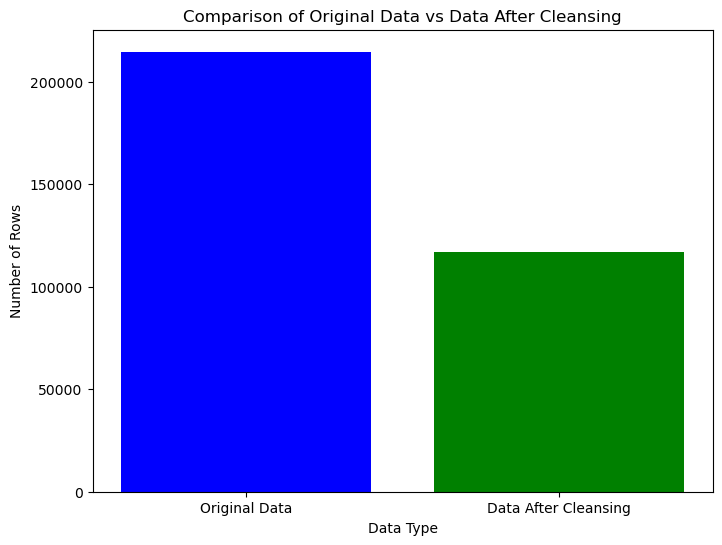

In [160]:
# Define the data
labels = ['Original Data', 'Data After Cleansing']
counts = [214595, 116942]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['blue', 'green'])
plt.xlabel('Data Type')
plt.ylabel('Number of Rows')
plt.title('Comparison of Original Data vs Data After Cleansing')
plt.show()

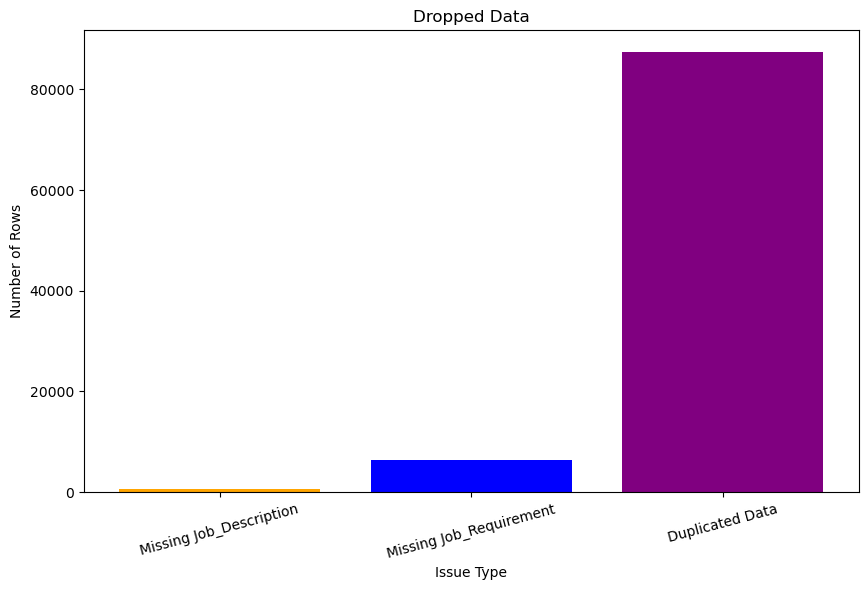

In [164]:
# Define the data
issues = ['Missing Job_Description', 'Missing Job_Requirement', 'Duplicated Data']
counts = [645, 6319, 87350]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(issues, counts, color=['orange','blue', 'purple'])
plt.xlabel('Issue Type')
plt.ylabel('Number of Rows')
plt.title('Dropped Data')
plt.xticks(rotation=15)
plt.show()

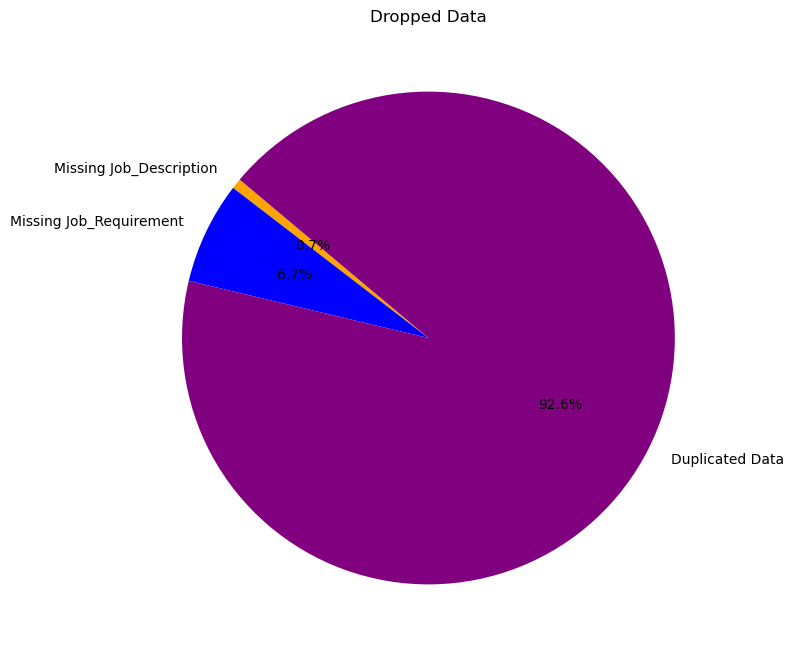

In [165]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=issues, autopct='%1.1f%%', startangle=140, colors=['Orange','blue', 'purple'])
plt.title('Dropped Data')
plt.show()

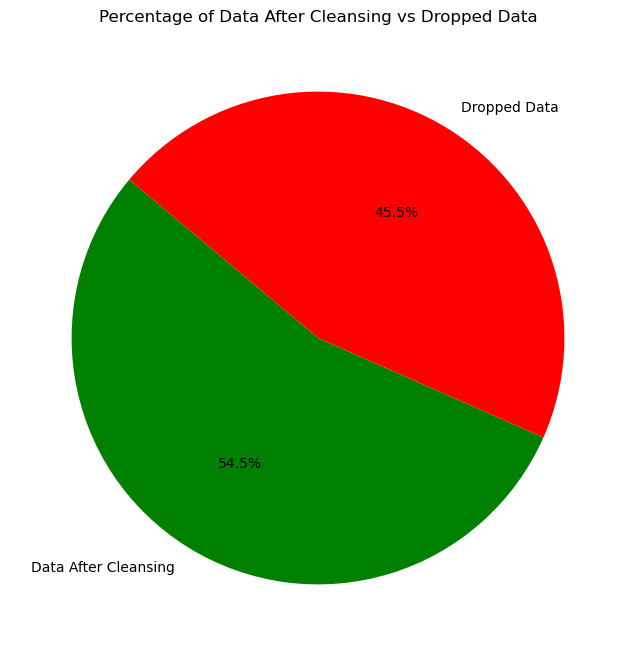

In [166]:
# Define the data
original_data = 214595
data_after_cleansing = 116942

# Calculate dropped data
dropped_data = original_data - data_after_cleansing

# Define labels and counts for the pie chart
labels = ['Data After Cleansing', 'Dropped Data']
counts = [data_after_cleansing, dropped_data]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
plt.title('Percentage of Data After Cleansing vs Dropped Data')
plt.show()


In [167]:
df.to_csv('Cleaned_Data_For_Modeling_V2.csv') 